In [30]:
import pandas as pd 
import numpy as np
from numpy import loadtxt
import warnings

from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_absolute_percentage_error as MAPE
from sklearn.metrics import mean_squared_error as MSE
import matplotlib.pyplot as plt
import shap

[[26268.8 3027.0 46 1.691160221]
 [18512.5 3273.0 49 1.817679558]
 [23285.0 1990.0 7 1.104972376]
 [27628.5 3491.0 53 1.93480663]
 [29661.5 4043.5 64 2.256906077]
 [25134.8 3295.5 41 1.827624309]
 [19989.2 2539.5 13 1.409392265]
 [28449.6 3145.0 37 1.751381215]
 [20883.6 3823.5 73 2.12320442]
 [31003.7 2674.5 20 1.493922652]
 [23880.0 2199.5 14 1.221546961]
 [31097.6 2680.0 31 1.490607735]
 [26172.5 2795.0 32 1.549723757]
 [23078.4 3054.5 32 1.693370166]
 [22623.0 2039.0 13 1.138674033]
 [24925.6 1974.0 7 1.100552486]
 [25977.5 3586.0 66 1.987845304]
 [26186.1 2694.5 32 1.495027624]
 [26935.0 2140.0 17 1.191712707]
 [24282.5 3021.5 48 1.679558011]
 [20802.8 3563.5 75 1.980110497]]
MAPE: 0.5066467625431691
RMSE: 20.98124190870177
RMSRE: 0.650726322717071


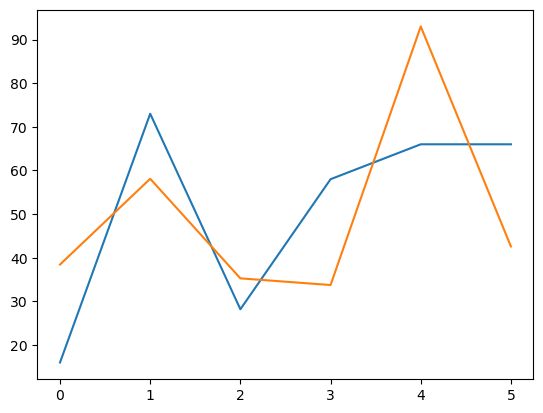

In [135]:
#load data
dataset = pd.read_csv("C:\\Users\\namil\\Downloads\\002data.csv").dropna().to_numpy()
selected_inputs = range(3,7,1)
X = dataset[:,selected_inputs]
Y = dataset[:,8]
print(X)

#split into train and test sets
seed = 7
test_size = 0.25
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

#make model
model = XGBRegressor()
model.fit(X_train, y_train)
prediction = model.predict(X_test)

#package error calculations
mape = MAPE(y_test, prediction)
print("MAPE:", mape)
mse = MSE(y_test, prediction)
rmse = mse**0.5
print("RMSE:", rmse)

plt.plot(y_test)
plt.plot(prediction)

#sicong's normalized rmse
arr = ((y_test - prediction)/y_test)**2
rmsre = (np.average(arr))**.5
print("RMSRE:", rmsre)

[[2.62350000e+04 2.96050000e+03 5.70000000e+01 1.64143646e+00]
 [2.92927000e+04 3.44750000e+03 8.70000000e+01 1.91049724e+00]
 [2.97730000e+04 6.52250000e+03 1.28000000e+02 3.61325967e+00]
 [2.40191000e+04 3.25100000e+03 7.50000000e+01 1.80552486e+00]
 [2.51600000e+04 4.28650000e+03 1.29000000e+02 2.37790055e+00]
 [2.46710000e+04 5.76900000e+03 1.53000000e+02 3.20276243e+00]
 [1.85054000e+04 4.99500000e+03 1.30000000e+02 2.77071823e+00]
 [2.66362000e+04 3.18000000e+03 7.30000000e+01 1.76685083e+00]
 [2.90033000e+04 4.83300000e+03 1.38000000e+02 2.68784530e+00]
 [2.78909000e+04 4.43200000e+03 1.16000000e+02 2.46353591e+00]
 [2.54253000e+04 4.87700000e+03 1.47000000e+02 2.70441989e+00]
 [2.63004000e+04 3.47500000e+03 9.00000000e+01 1.93370166e+00]
 [1.77338000e+04 3.90800000e+03 9.80000000e+01 2.16961326e+00]
 [2.13379000e+04 3.67600000e+03 9.70000000e+01 2.04033149e+00]
 [2.23875000e+04 6.47850000e+03 1.57000000e+02 3.59005525e+00]
 [1.88596000e+04 5.15700000e+03 1.52000000e+02 2.860220

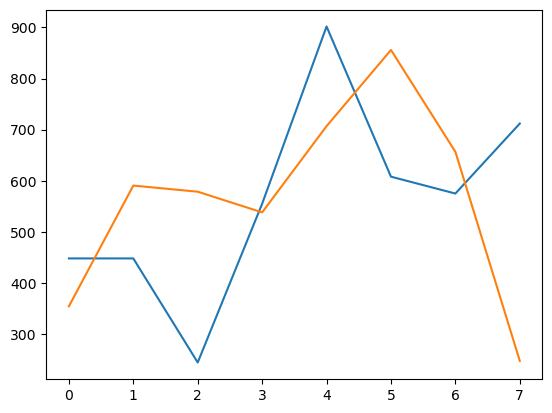

In [28]:
selected_inputs = range(9,13,1)
output = 'calories'


test = pd.read_csv("C:\\Users\\namil\\Documents\\stmi-lab-namila\\allmetrics3")
valid = test[test['dexcom 3hr auc'] != "error"]
X = valid.iloc[:, selected_inputs].to_numpy()
Y = valid[output].to_numpy()

#split into train and test sets
seed = 7
test_size = 0.25
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

#make model
model = XGBRegressor()
model.fit(X_train, y_train)
prediction = model.predict(X_test)

plt.plot(y_test)
plt.plot(prediction)

#sicong's normalized rmse
arr = ((y_test - prediction)/y_test)**2
rmsre = (np.average(arr))**.5
print("RMSRE:", rmsre)

RMSRE: 0.5784855029923067


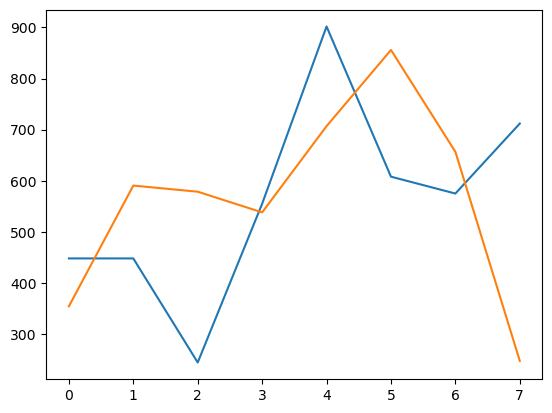

In [18]:
#delete meals w snack nearby
test = pd.read_csv("C:\\Users\\namil\\Downloads\\real.csv")
test = test[test['snack in 3hrs'] == False]

valid = test[test['dexcom 3hr auc'] != "error"]
X = valid.iloc[:, 8:12].to_numpy()
Y = valid['calories'].to_numpy()

#split into train and test sets
seed = 7
test_size = 0.25
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)


#make model
model = XGBRegressor()
model.fit(X_train, y_train)
prediction = model.predict(X_test)

plt.plot(y_test)
plt.plot(prediction)

#sicong's normalized rmse
arr = ((y_test - prediction)/y_test)**2
rmsre = (np.average(arr))**.5
print("RMSRE:", rmsre)

In [35]:
count = 0
def basemodel(participant, arr, start, end, topredict, removesnacks, nodinners):
    #delete meals w snack nearby
    #test = pd.read_csv(f"C:\\Users\\namil\\Documents\\stmi-lab-namila\\combined_dataset")
    test = pd.read_csv(f"C:\\Users\\namil\\Documents\\stmi-lab-namila\\allmetricsn{participant}")
    
    if nodinners:
        test = test[test['Meal Type'] != "dinner"]
    
    if removesnacks:
        test = test[test['snack in 3hrs'] == False]

    valid = test[test['dexcom 3hr auc'] != "error"]
    valid = valid[valid['mets 3 hr auc'] != "error"]
    
    X = valid.loc[:, start:end].to_numpy().astype(float)
    Y = valid[topredict].to_numpy().astype(float)
    warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)


    #split into train and test sets
    seed = 7
    test_size = 0.25
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
    
    #make model
    model = XGBRegressor()
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)

#     plt.plot(y_test)
#     plt.plot(prediction)
#     plt.show()
    
    print(f"predicting {topredict} from {start} to {end}:")
    #sicong's normalized rmse
    errors = ((y_test - prediction)/y_test)**2
    rmsre = (np.average(errors))**.5
    print("RMSRE:", round(rmsre,7))
    
    arr.append(rmsre)
    
    explainer = shap.Explainer(model.predict, X_train)
    colnames = np.array(valid.loc[:, start:end].columns.tolist())
    explainer.feature_names = colnames.reshape((-1,1))
    shap_values = explainer(X_test)
    #shap.summary_plot(shap_values)
    shap.plots.bar(shap_values)

def runfour(errors, start, end, topredict):
    global savedval
    savedval = basemodel(x, errors[0], start, end, topredict, 0, 1)
    basemodel(x, errors[1], start, end, topredict, 1, 1)
    savedval = basemodel(x, errors[2], start, end, topredict,  0, 0)
    basemodel(x, errors[3], start, end, topredict, 1, 0)

1
predicting carbs from peakheight to mets 3 hr avg:
RMSRE: 0.2742467


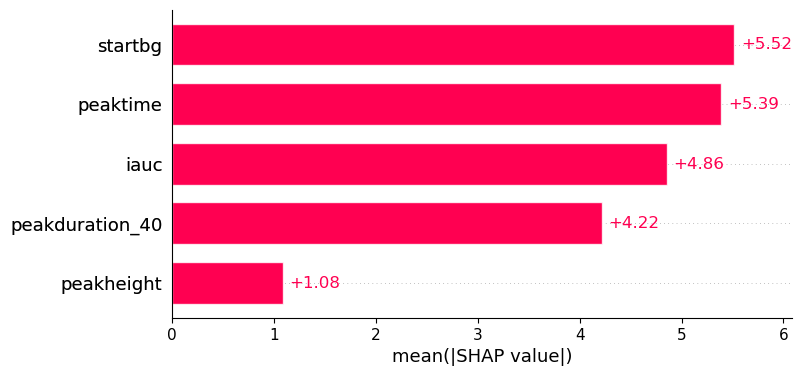

predicting carbs from peakheight to mets 3 hr avg:
RMSRE: 1.209512


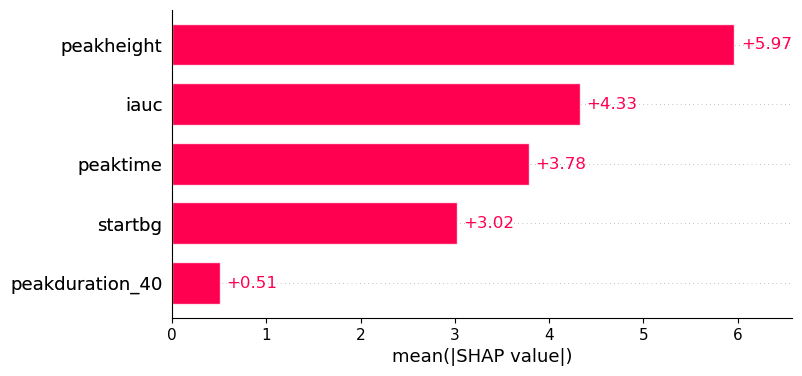

predicting carbs from peakheight to mets 3 hr avg:
RMSRE: 0.41104


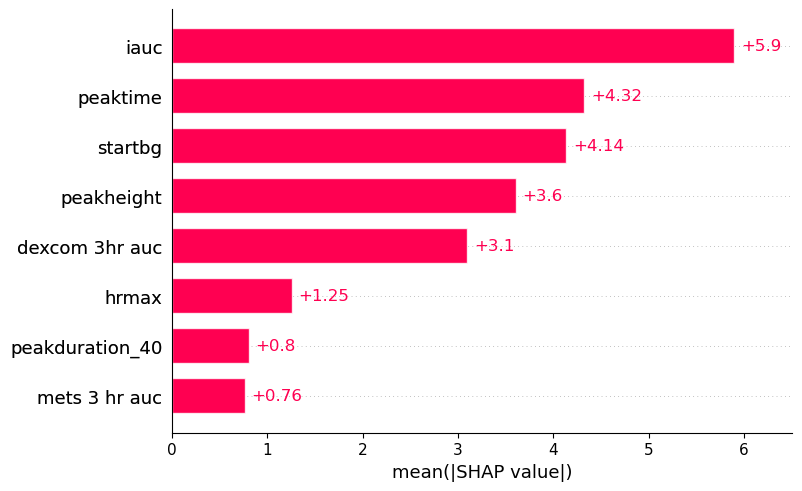

predicting carbs from peakheight to mets 3 hr avg:
RMSRE: 0.5327239


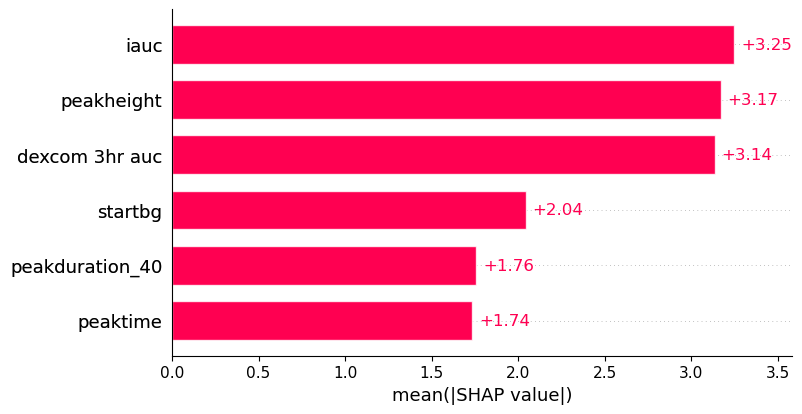

predicting calories from peakheight to mets 3 hr avg:
RMSRE: 0.6185043


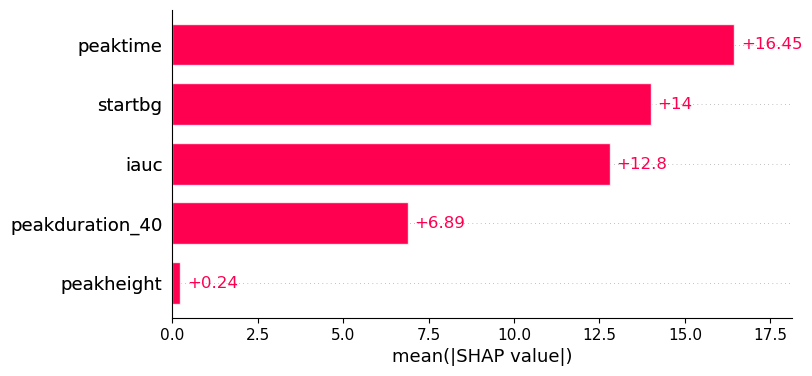

predicting calories from peakheight to mets 3 hr avg:
RMSRE: 0.4569432


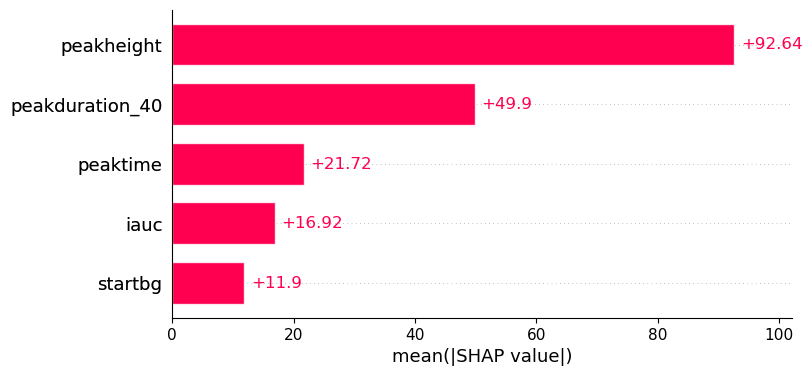

predicting calories from peakheight to mets 3 hr avg:
RMSRE: 0.51223


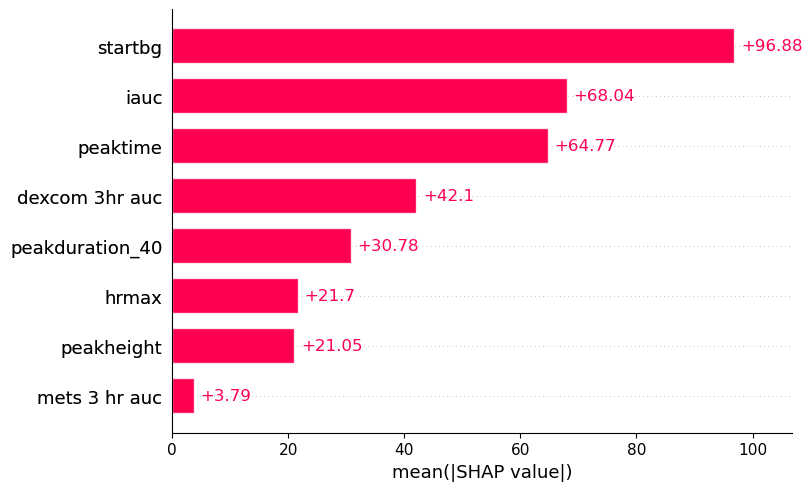

predicting calories from peakheight to mets 3 hr avg:
RMSRE: 1.108241


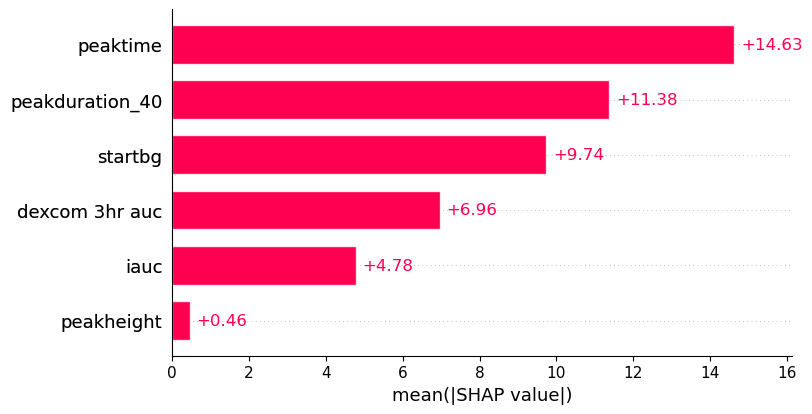

predicting peakheight from mets 3 hr auc to fat:
RMSRE: 0.0892593


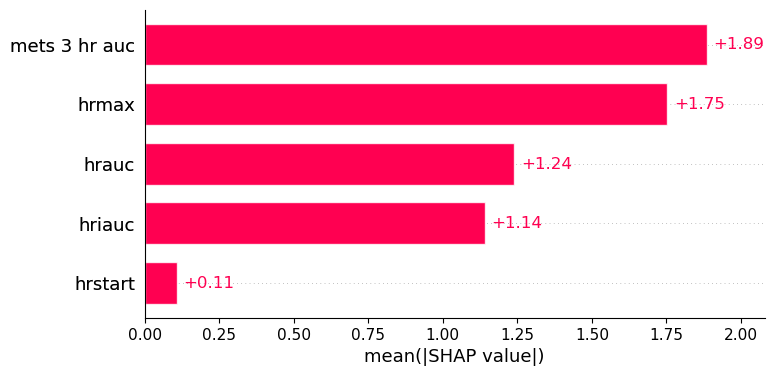

predicting peakheight from mets 3 hr auc to fat:
RMSRE: 0.1155497


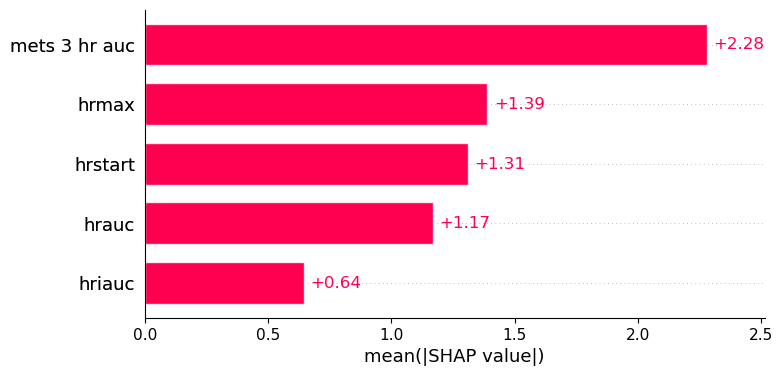

predicting peakheight from mets 3 hr auc to fat:
RMSRE: 0.1197021


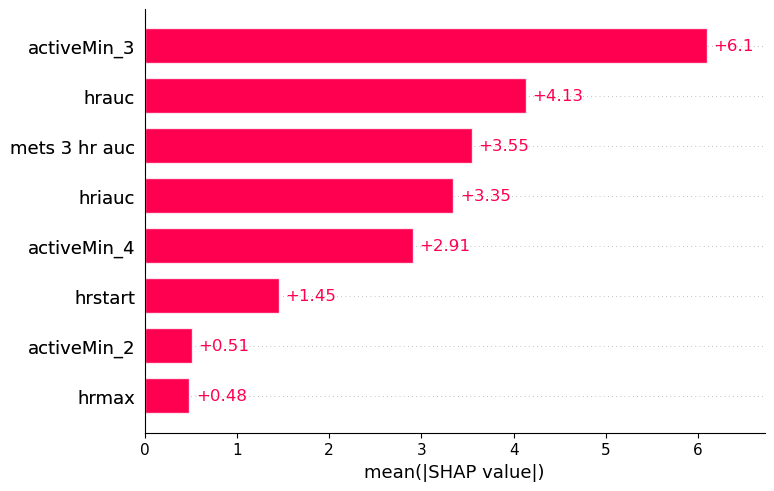

predicting peakheight from mets 3 hr auc to fat:
RMSRE: 0.1282252


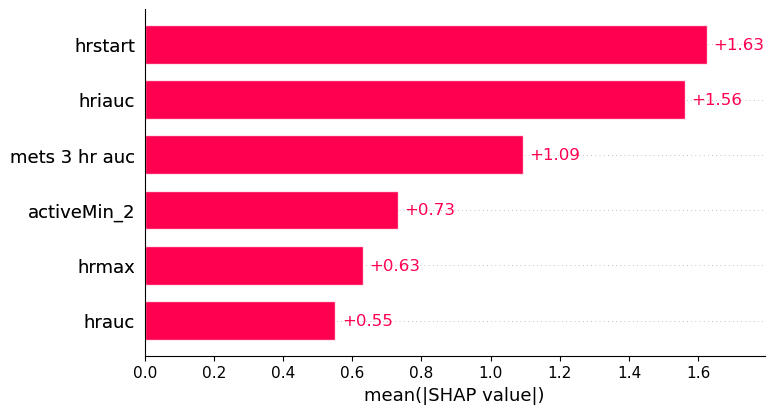

predicting dexcom 3hr auc from mets 3 hr auc to fat:
RMSRE: 0.1231664


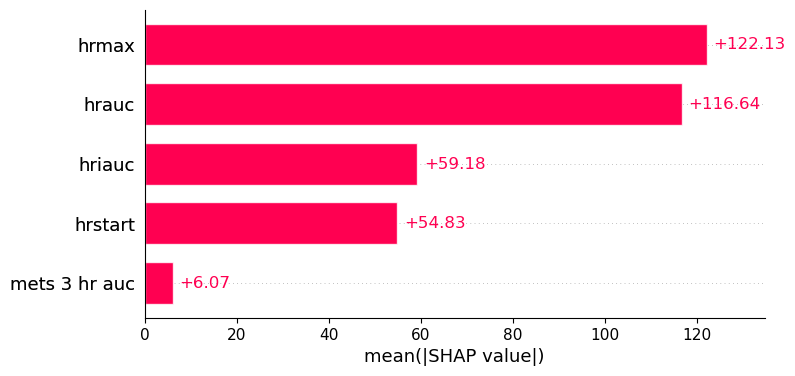

predicting dexcom 3hr auc from mets 3 hr auc to fat:
RMSRE: 0.089796


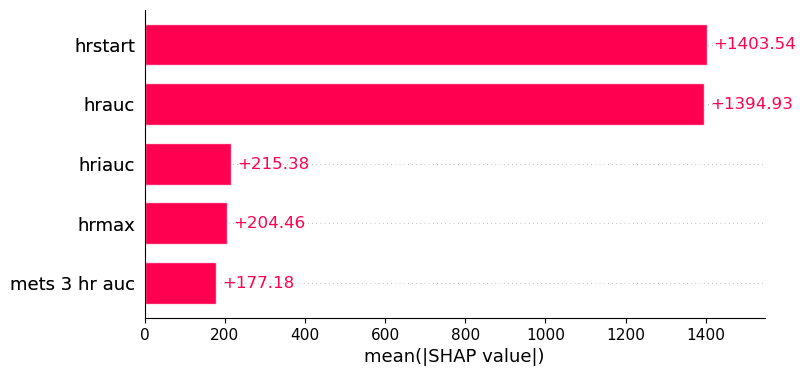

predicting dexcom 3hr auc from mets 3 hr auc to fat:
RMSRE: 0.0938405


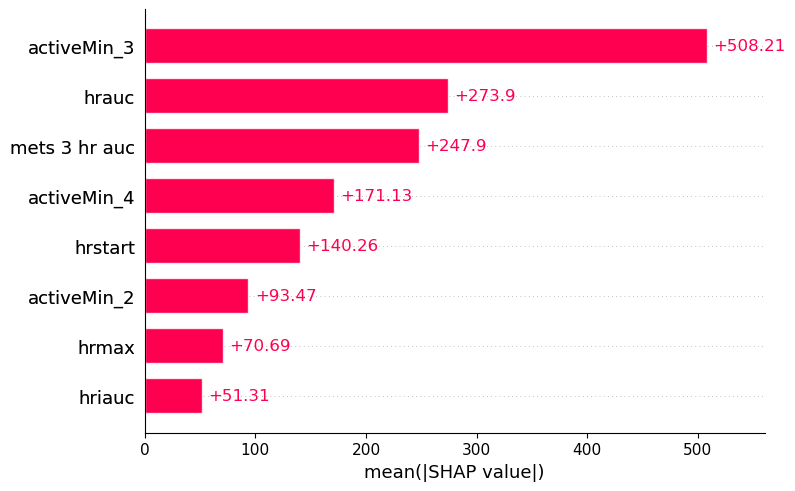

predicting dexcom 3hr auc from mets 3 hr auc to fat:
RMSRE: 0.0997896


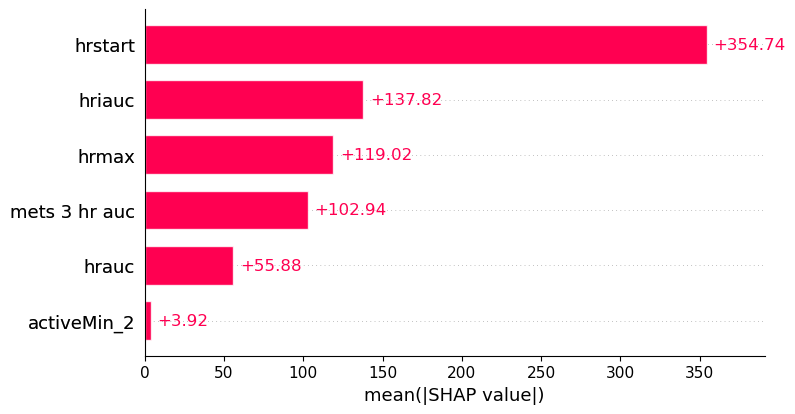

predicting iauc from mets 3 hr auc to fat:
RMSRE: 1.8675366


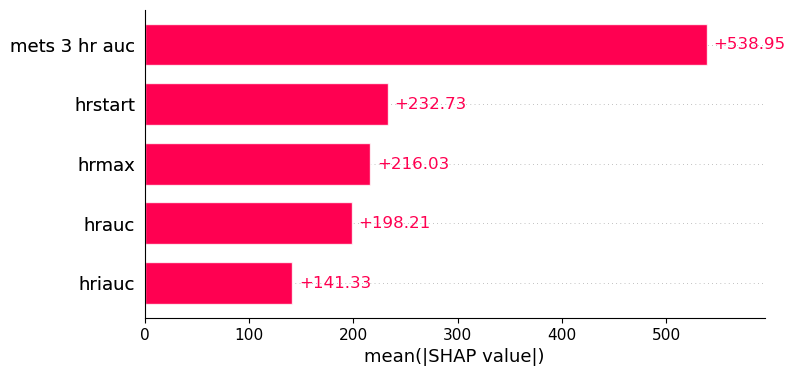

predicting iauc from mets 3 hr auc to fat:
RMSRE: 3.1731096


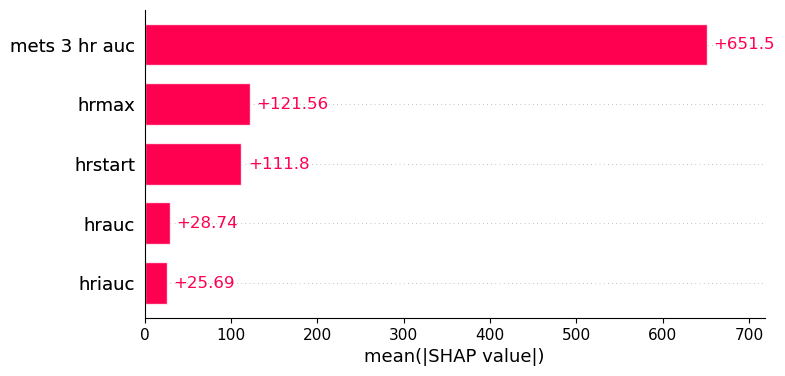

predicting iauc from mets 3 hr auc to fat:
RMSRE: 2.0101761


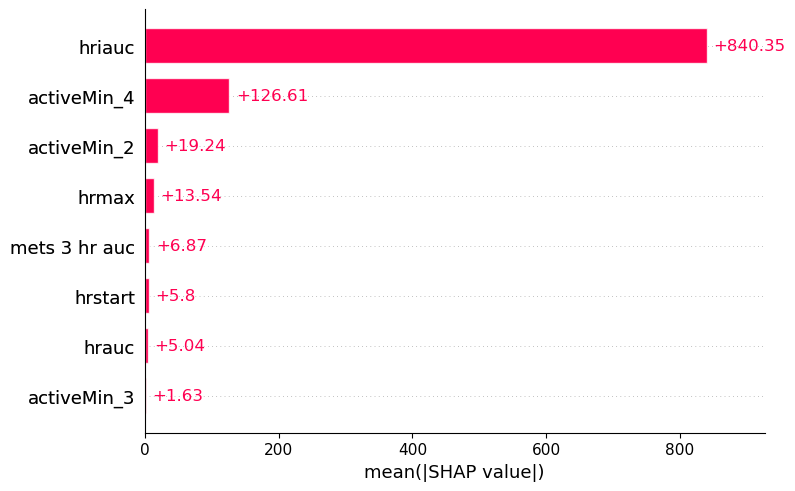

predicting iauc from mets 3 hr auc to fat:
RMSRE: 1.6053128


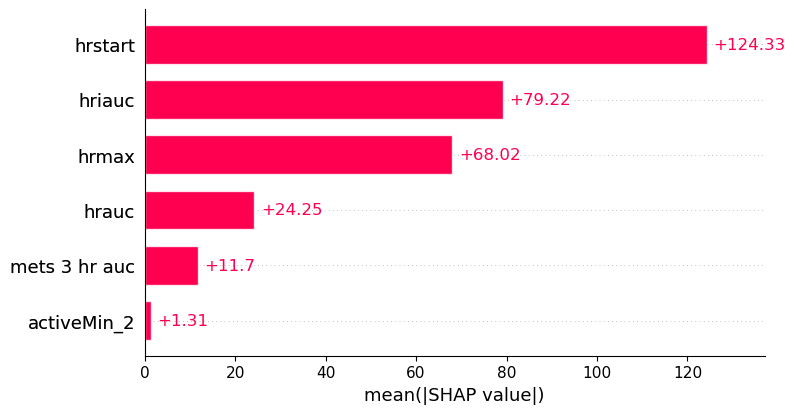

predicting peaktime from mets 3 hr auc to fat:
RMSRE: 0.5236041


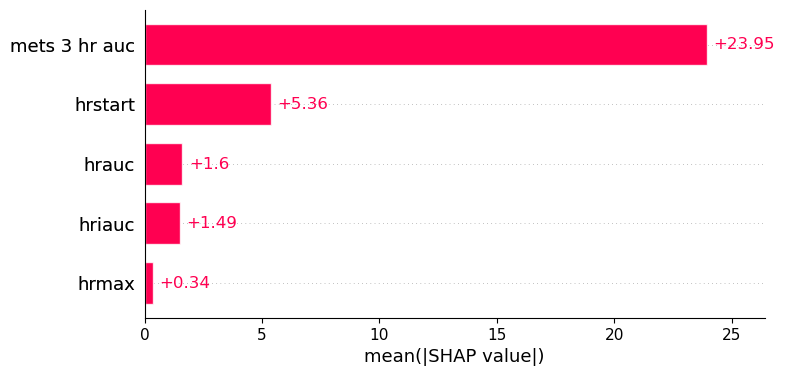

predicting peaktime from mets 3 hr auc to fat:
RMSRE: 0.4912171


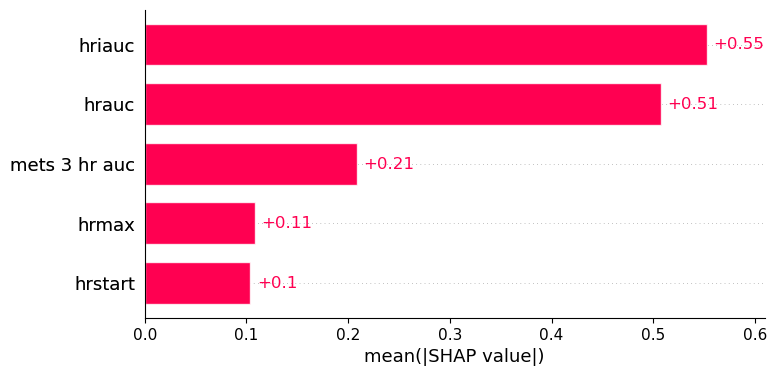

predicting peaktime from mets 3 hr auc to fat:
RMSRE: 2.1556654


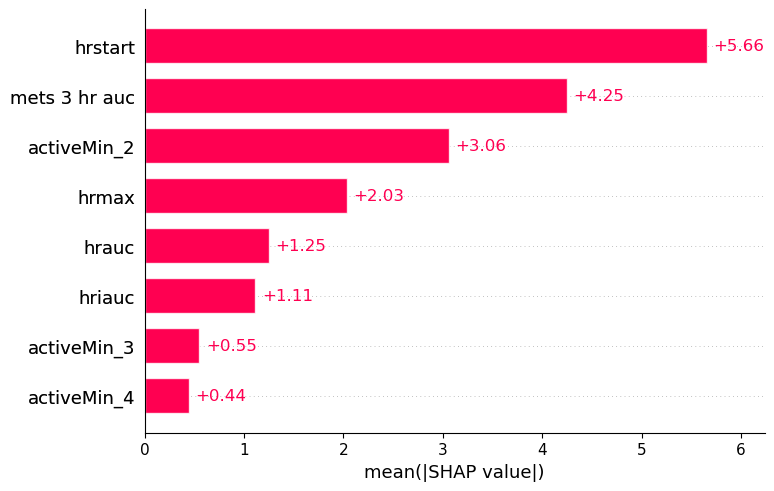

predicting peaktime from mets 3 hr auc to fat:
RMSRE: 1.4878245


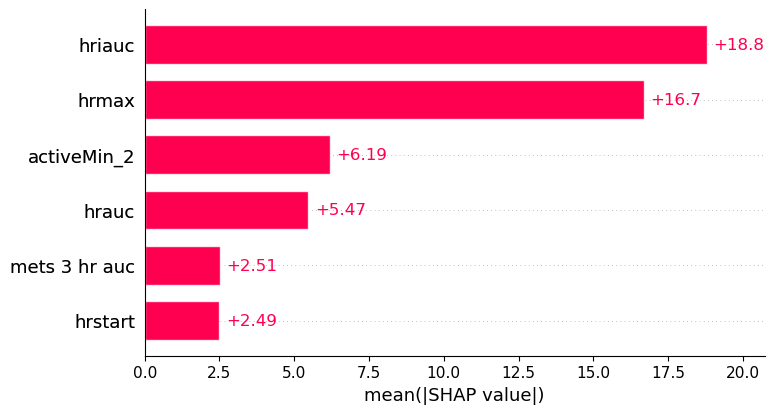

predicting peakduration_40 from mets 3 hr auc to fat:
RMSRE: 0.6839829


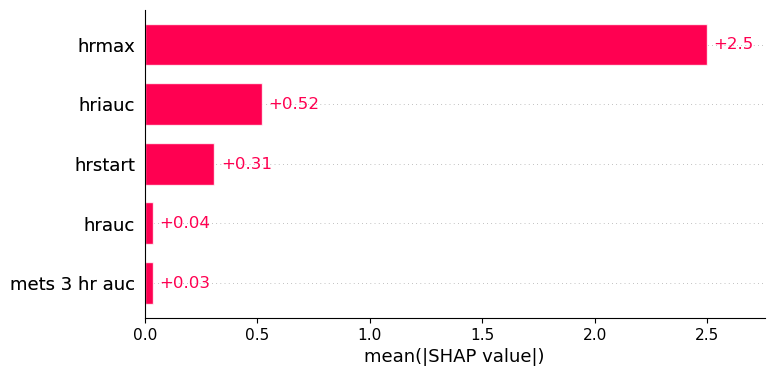

predicting peakduration_40 from mets 3 hr auc to fat:
RMSRE: 0.5094834


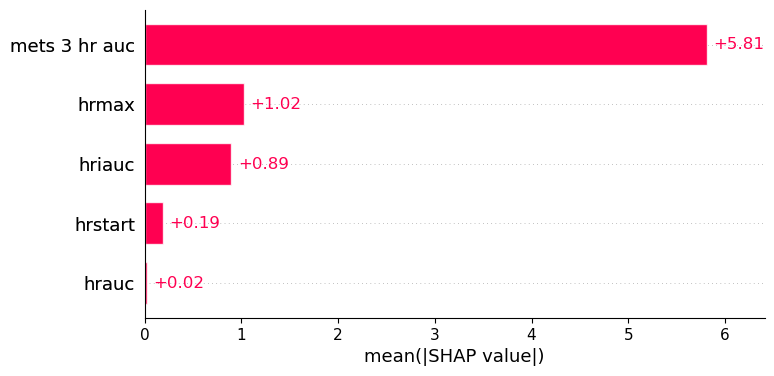

predicting peakduration_40 from mets 3 hr auc to fat:
RMSRE: 0.496986


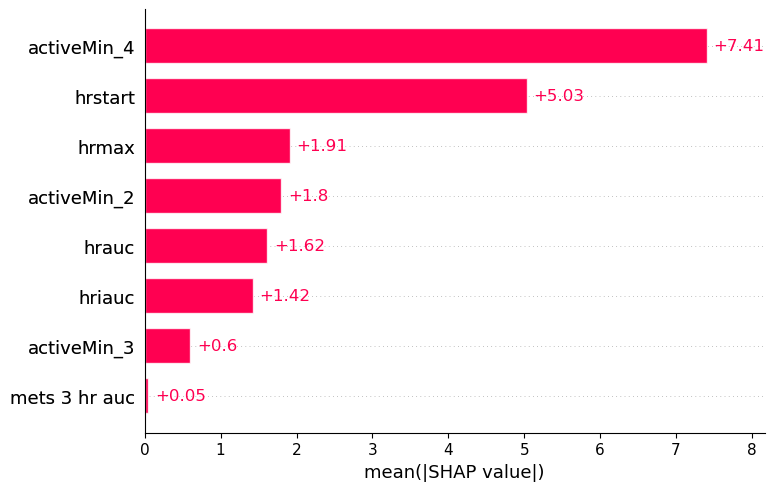

predicting peakduration_40 from mets 3 hr auc to fat:
RMSRE: 1.1882995


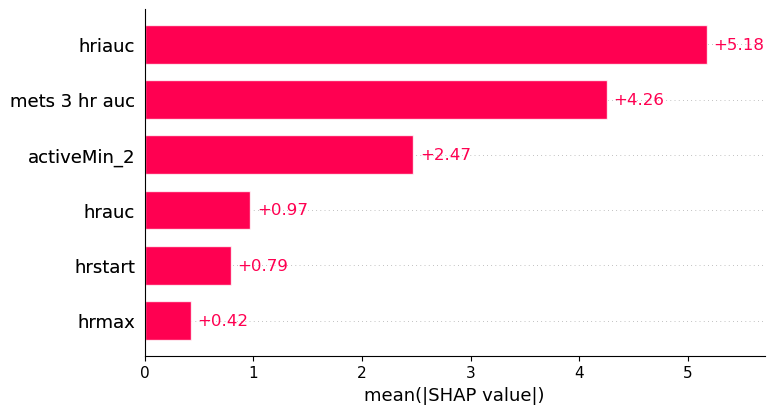

predicting startbg from mets 3 hr auc to fat:
RMSRE: 0.1656278


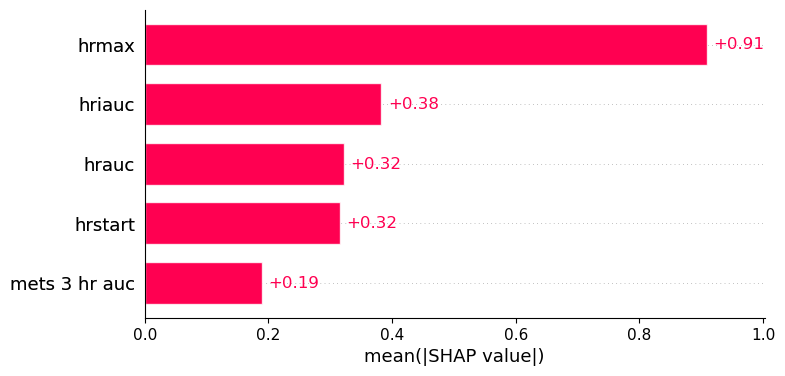

predicting startbg from mets 3 hr auc to fat:
RMSRE: 0.103265


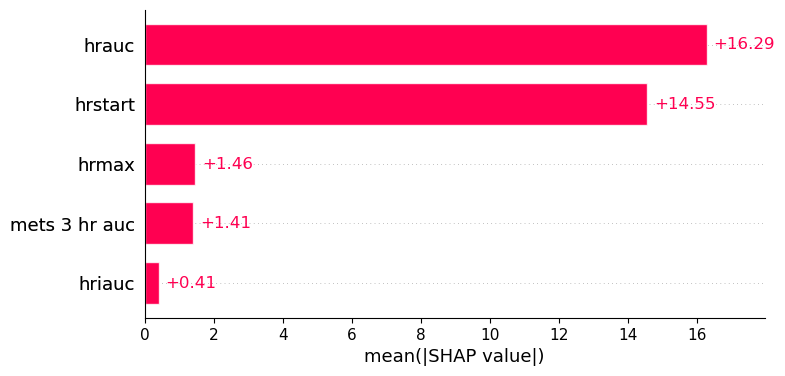

predicting startbg from mets 3 hr auc to fat:
RMSRE: 0.0650217


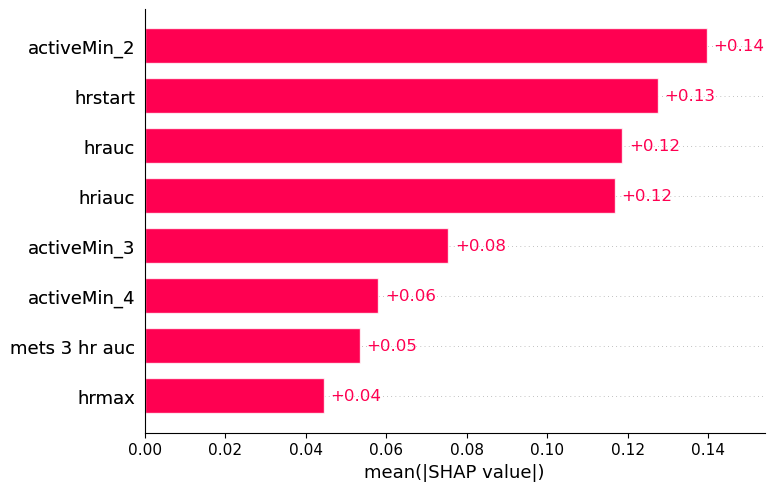

predicting startbg from mets 3 hr auc to fat:
RMSRE: 0.100181


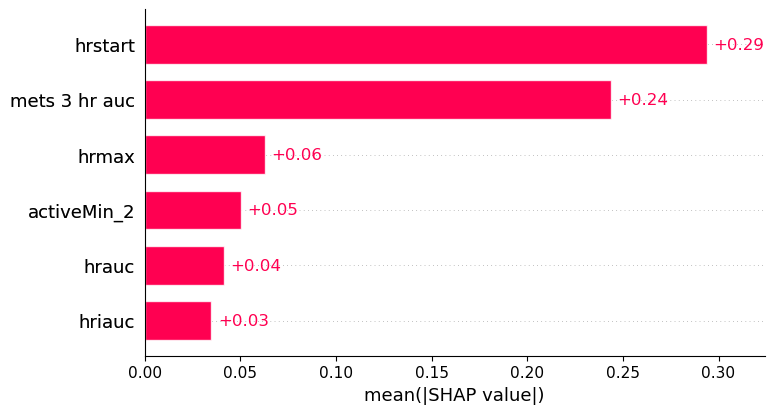

2
predicting carbs from peakheight to mets 3 hr avg:
RMSRE: 0.4035723


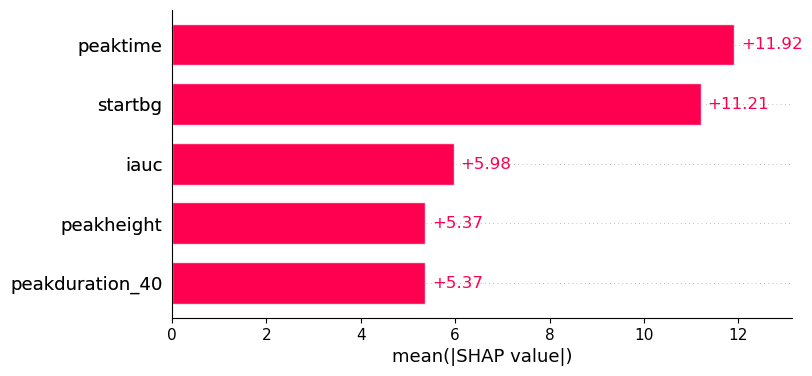

predicting carbs from peakheight to mets 3 hr avg:
RMSRE: 1.4996666


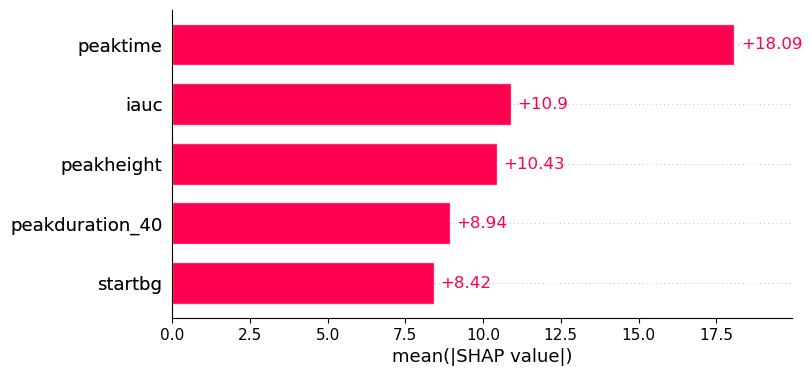

predicting carbs from peakheight to mets 3 hr avg:
RMSRE: 0.4333803


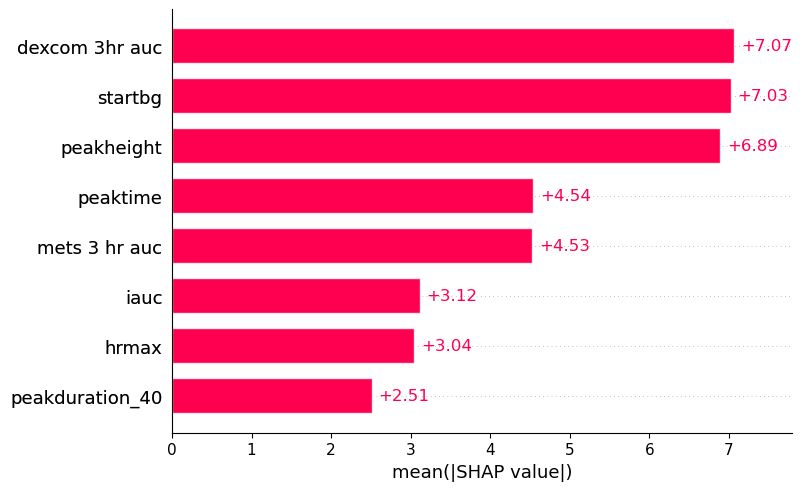

predicting carbs from peakheight to mets 3 hr avg:
RMSRE: 1.060839


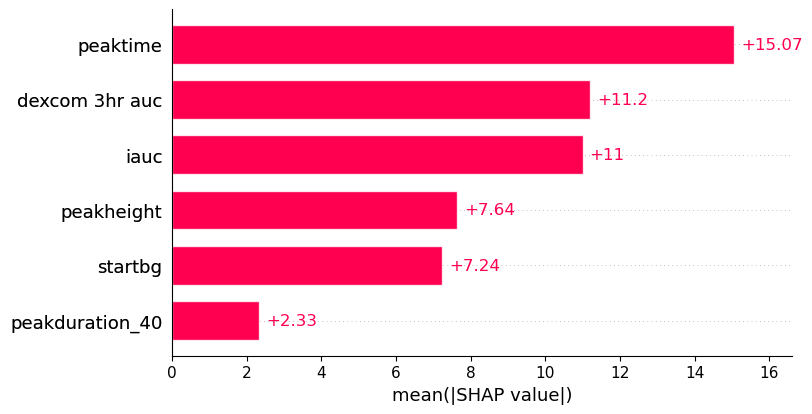

predicting calories from peakheight to mets 3 hr avg:
RMSRE: 0.3723798


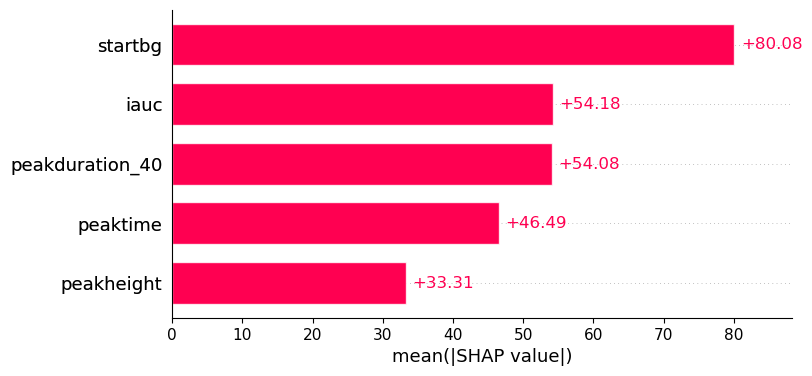

predicting calories from peakheight to mets 3 hr avg:
RMSRE: 1.2241956


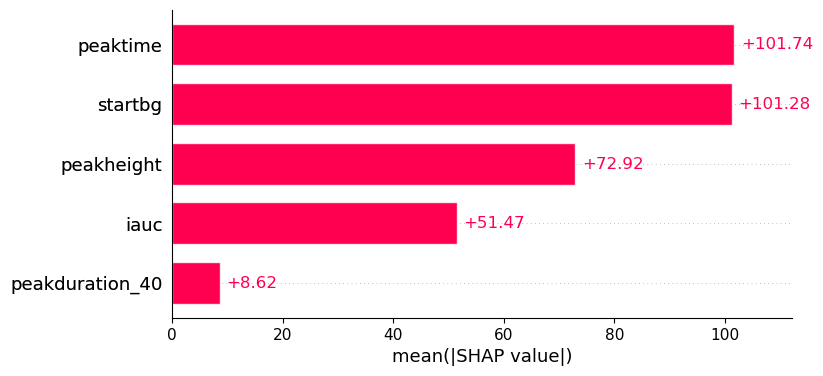

predicting calories from peakheight to mets 3 hr avg:
RMSRE: 0.3671803


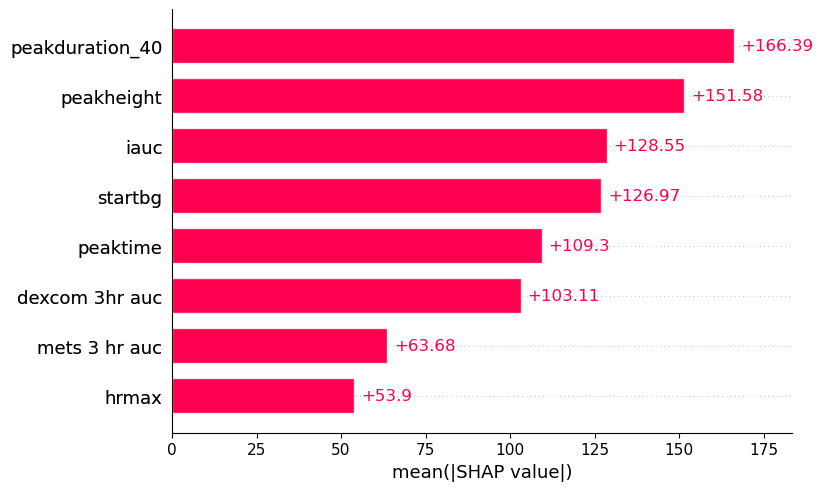

predicting calories from peakheight to mets 3 hr avg:
RMSRE: 1.5420677


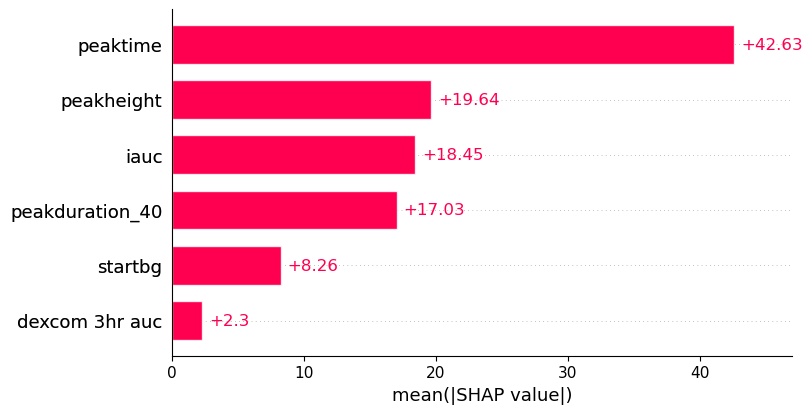

predicting peakheight from mets 3 hr auc to fat:
RMSRE: 0.2103403


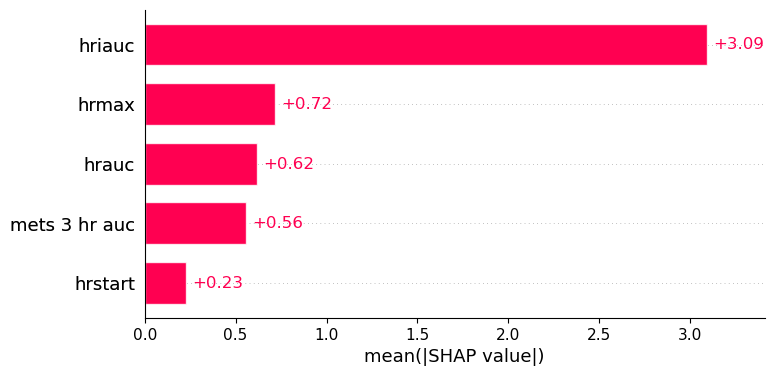

predicting peakheight from mets 3 hr auc to fat:
RMSRE: 0.2031315


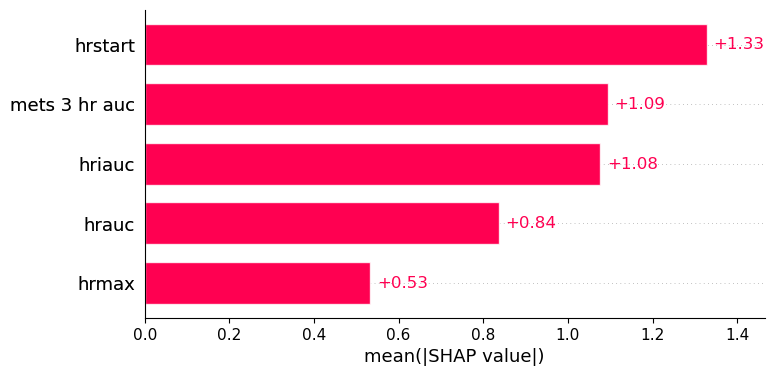

predicting peakheight from mets 3 hr auc to fat:
RMSRE: 0.2182391


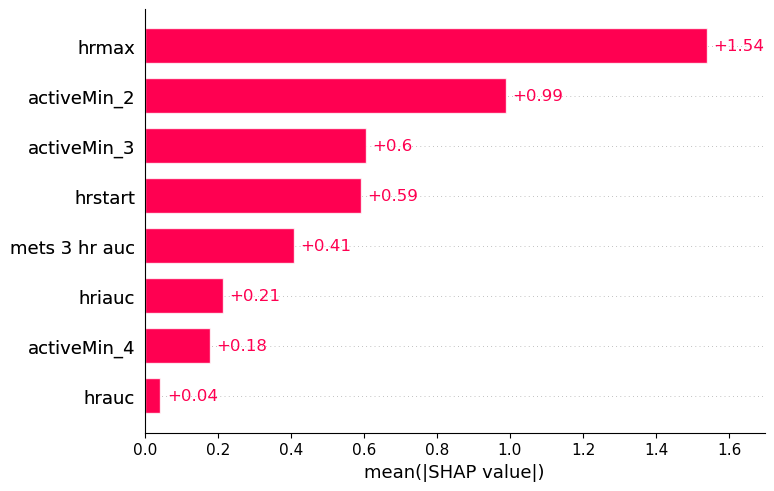

predicting peakheight from mets 3 hr auc to fat:
RMSRE: 0.1468474


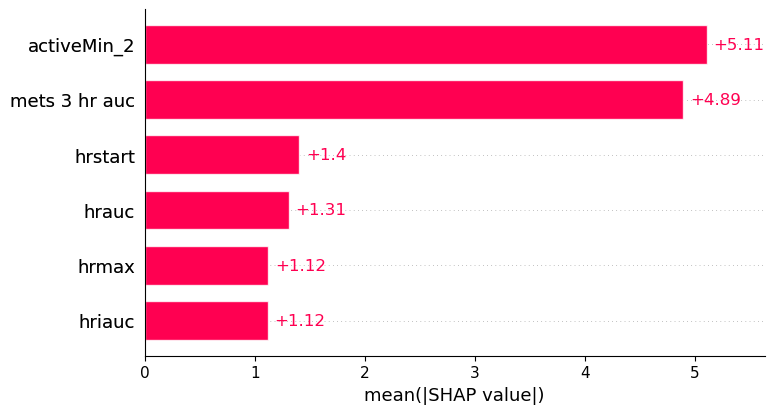

predicting dexcom 3hr auc from mets 3 hr auc to fat:
RMSRE: 0.1788203


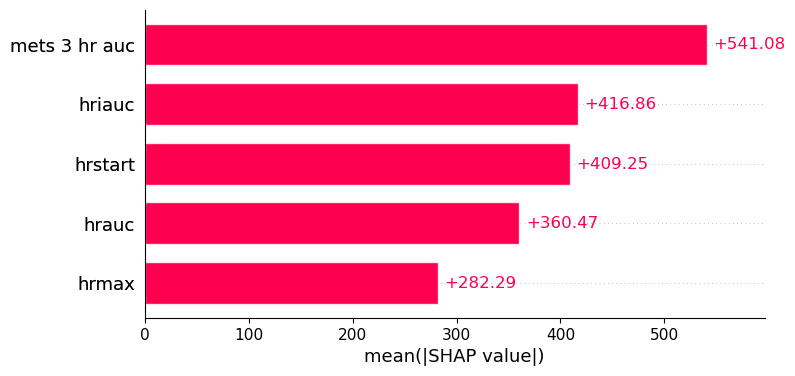

predicting dexcom 3hr auc from mets 3 hr auc to fat:
RMSRE: 0.1320748


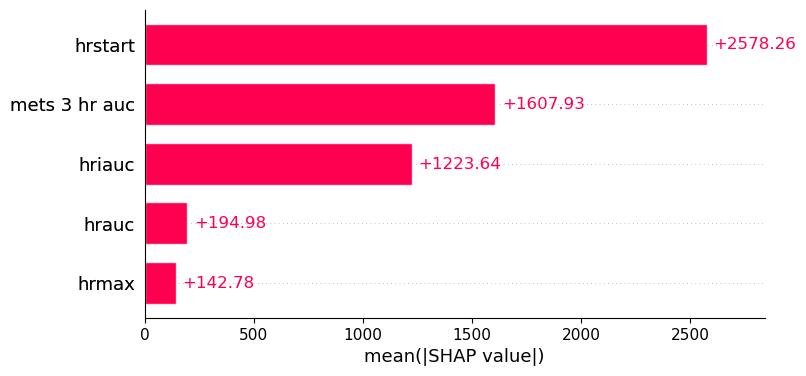

predicting dexcom 3hr auc from mets 3 hr auc to fat:
RMSRE: 0.1759815


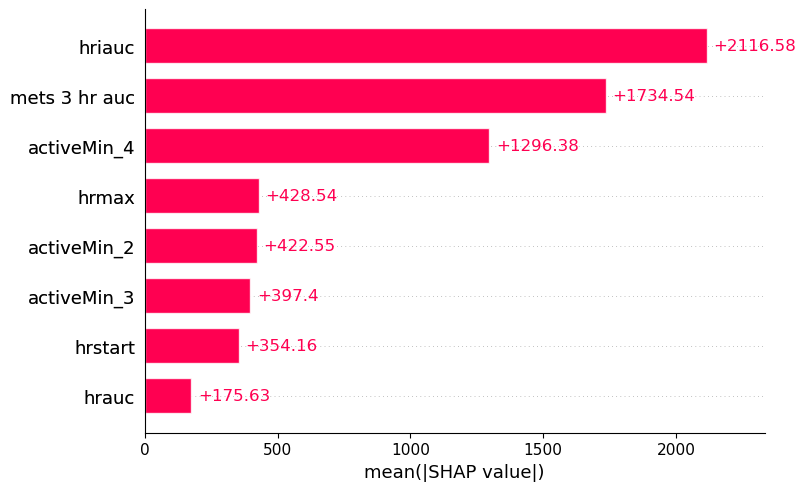

predicting dexcom 3hr auc from mets 3 hr auc to fat:
RMSRE: 0.0816383


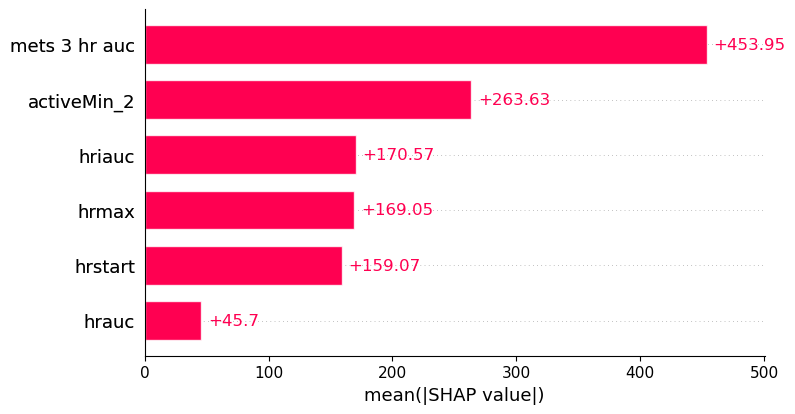

predicting iauc from mets 3 hr auc to fat:
RMSRE: 1.2796358


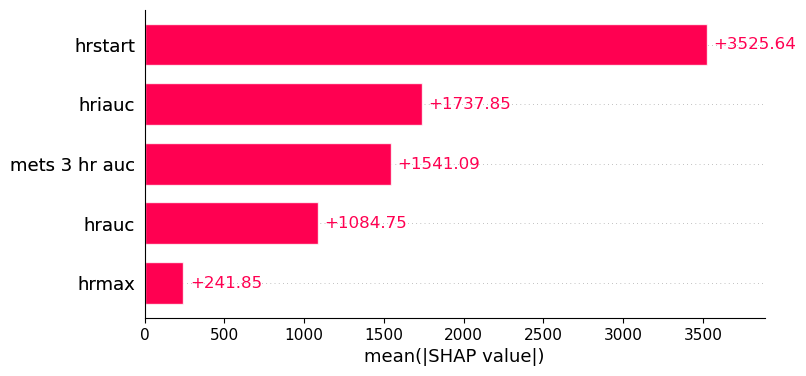

predicting iauc from mets 3 hr auc to fat:
RMSRE: 1.1899279


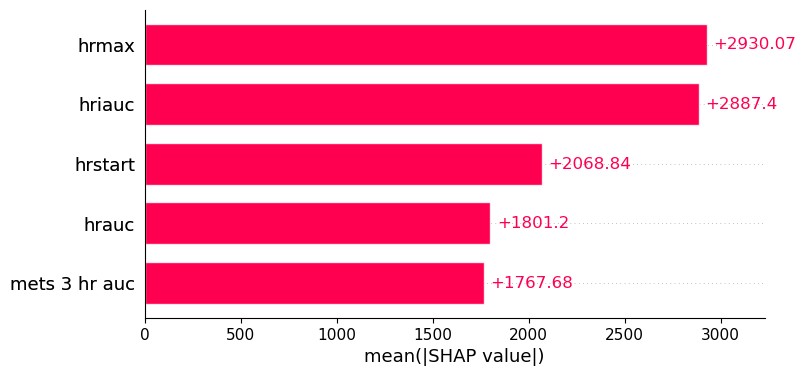

predicting iauc from mets 3 hr auc to fat:
RMSRE: 1.9476379


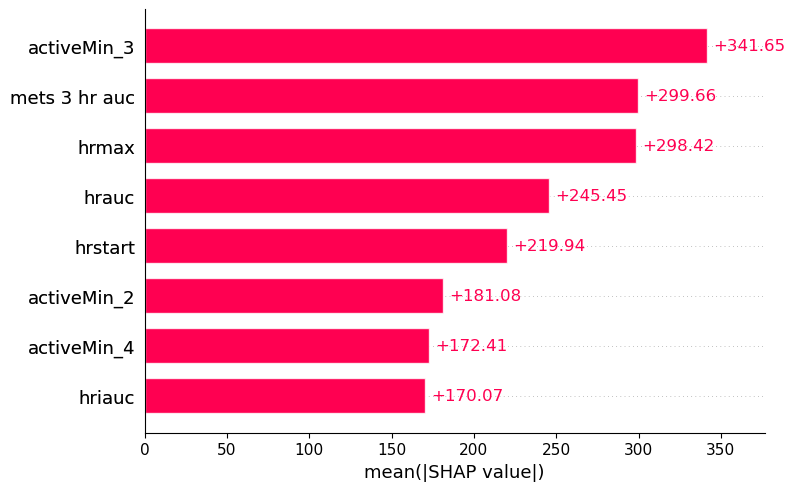

predicting iauc from mets 3 hr auc to fat:
RMSRE: 1.2861387


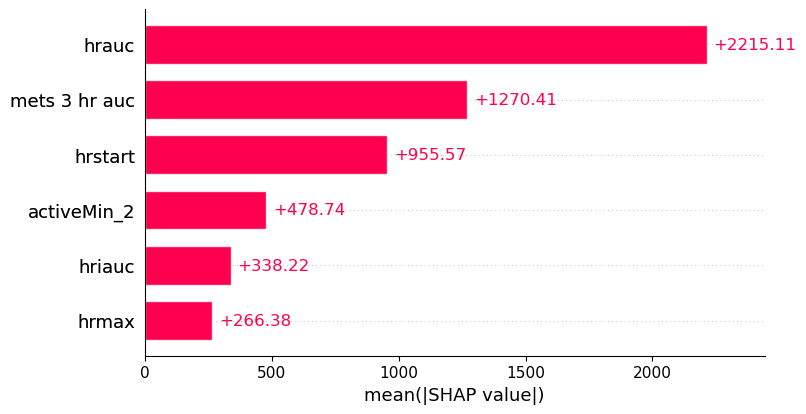

predicting peaktime from mets 3 hr auc to fat:
RMSRE: 1.0325633


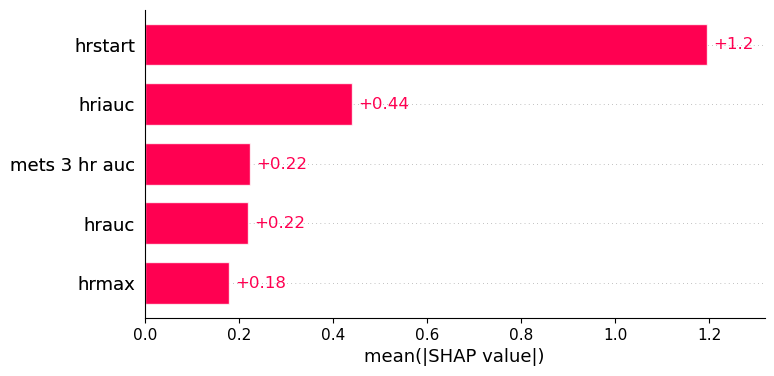

predicting peaktime from mets 3 hr auc to fat:
RMSRE: 0.5153458


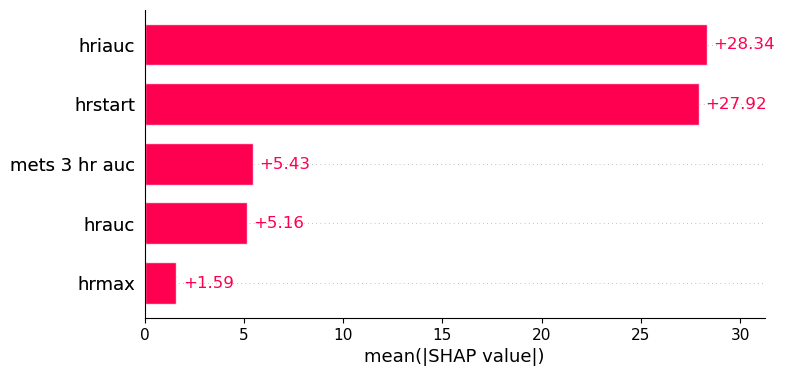

predicting peaktime from mets 3 hr auc to fat:
RMSRE: 0.6480097


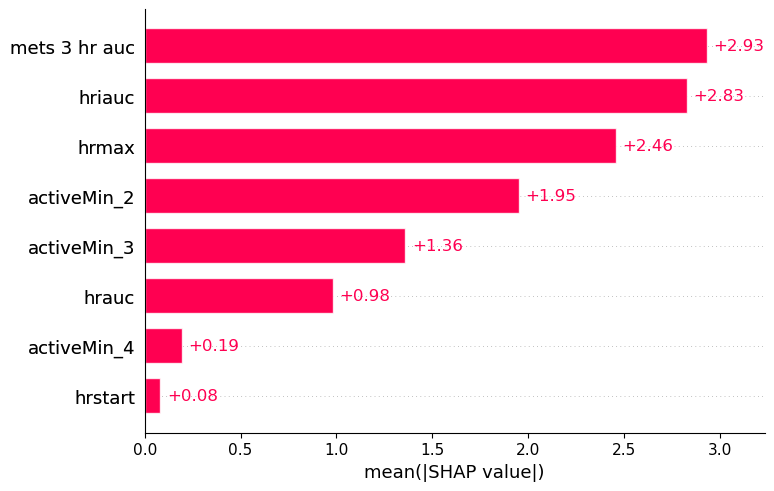

predicting peaktime from mets 3 hr auc to fat:
RMSRE: 0.7520255


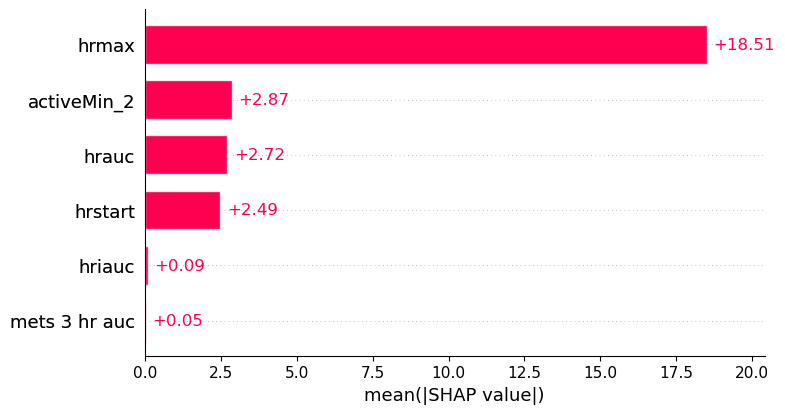

predicting peakduration_40 from mets 3 hr auc to fat:
RMSRE: 1.7649844


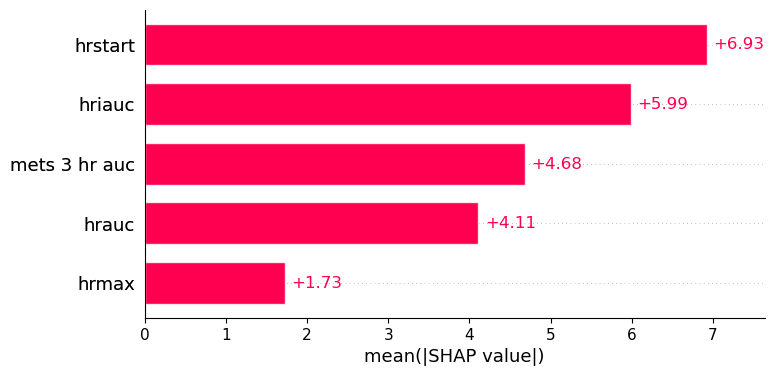

predicting peakduration_40 from mets 3 hr auc to fat:
RMSRE: 1.4560447


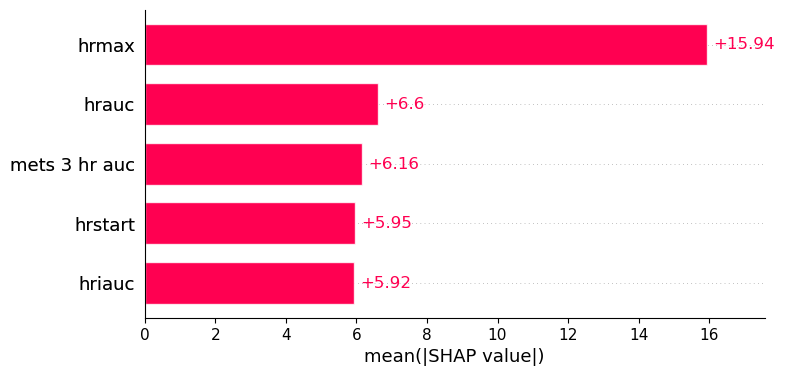

predicting peakduration_40 from mets 3 hr auc to fat:
RMSRE: 0.6155947


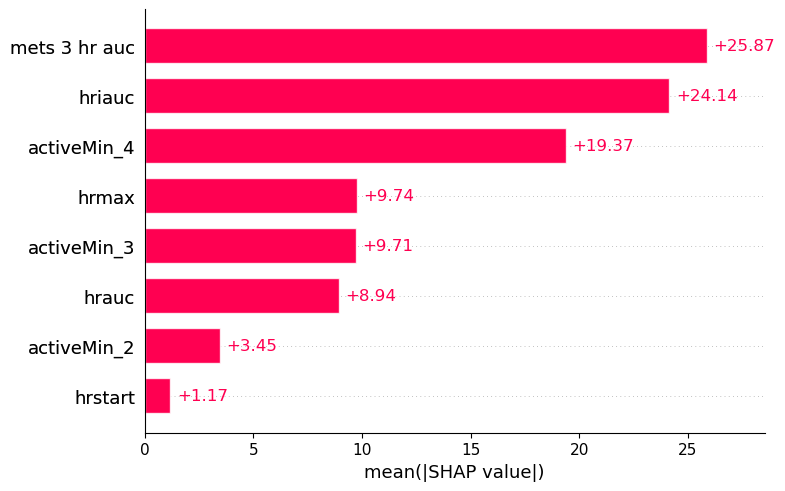

predicting peakduration_40 from mets 3 hr auc to fat:
RMSRE: 1.423888


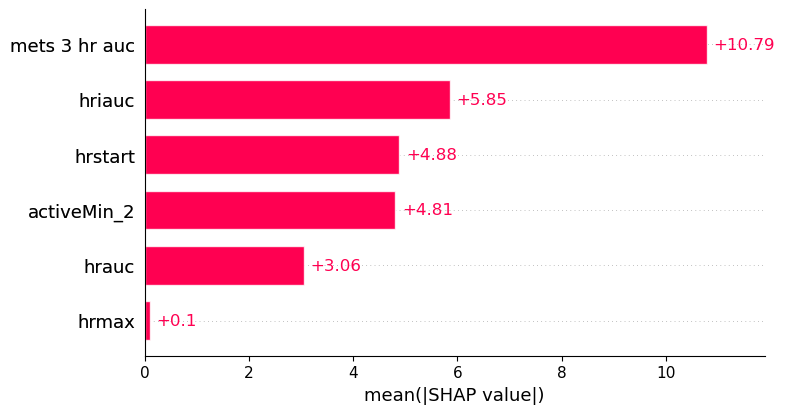

predicting startbg from mets 3 hr auc to fat:
RMSRE: 0.3004143


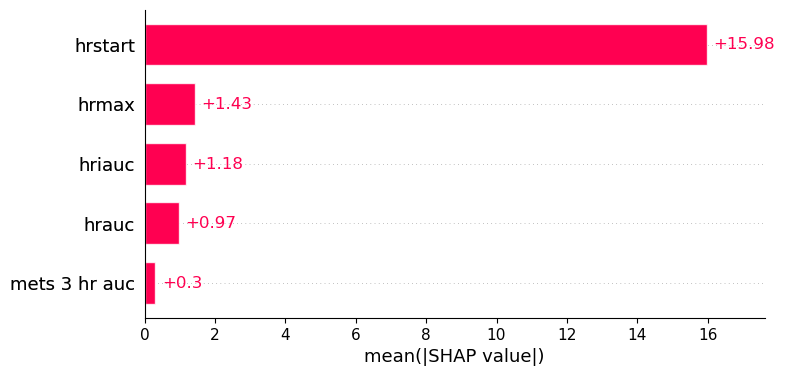

predicting startbg from mets 3 hr auc to fat:
RMSRE: 0.1741935


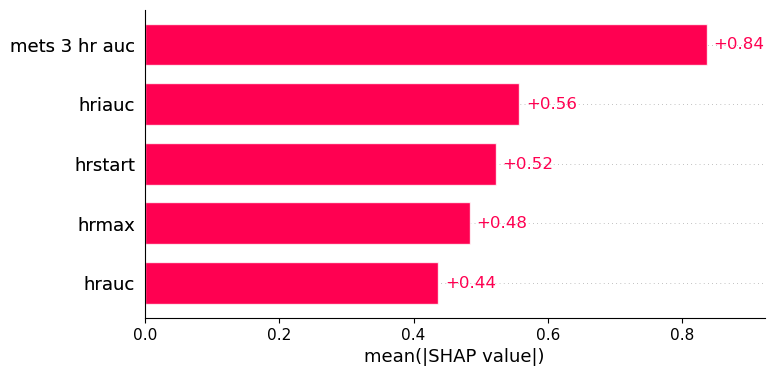

predicting startbg from mets 3 hr auc to fat:
RMSRE: 0.3463425


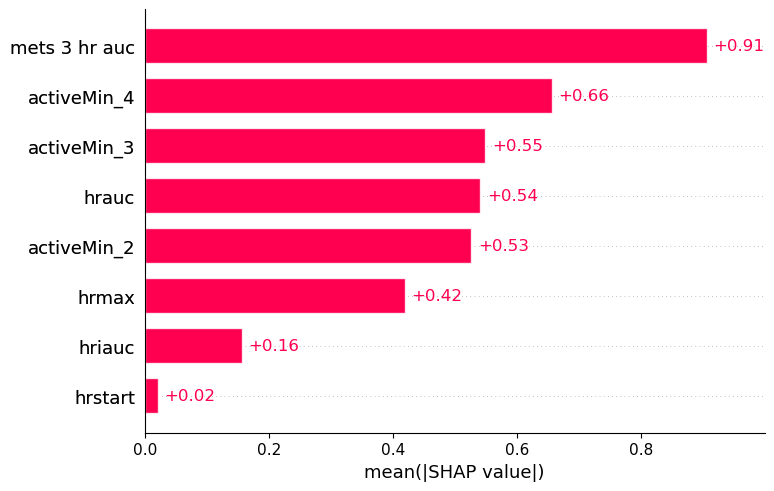

predicting startbg from mets 3 hr auc to fat:
RMSRE: 0.085917


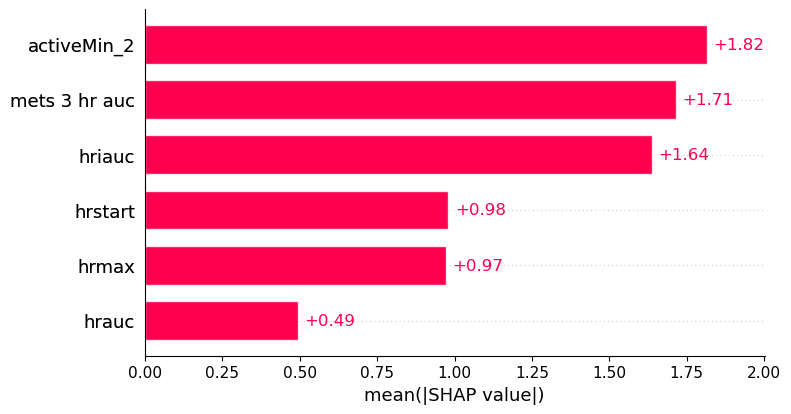

3
predicting carbs from peakheight to mets 3 hr avg:
RMSRE: 0.2350885


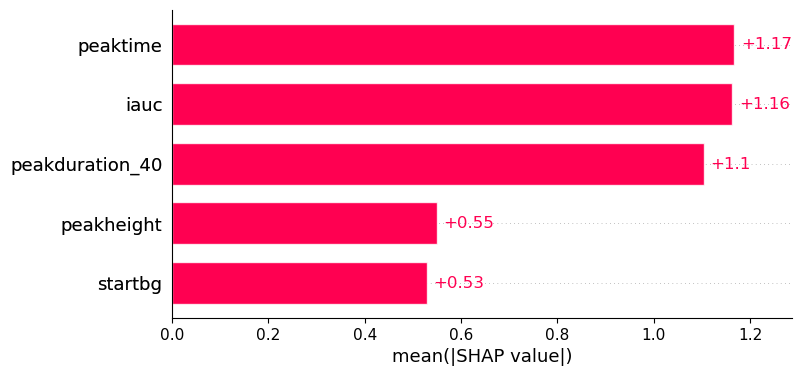

predicting carbs from peakheight to mets 3 hr avg:
RMSRE: 0.2350885


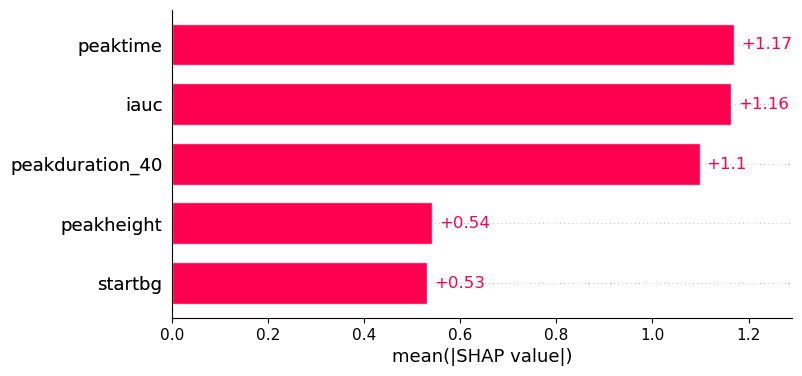

predicting carbs from peakheight to mets 3 hr avg:
RMSRE: 0.2954795


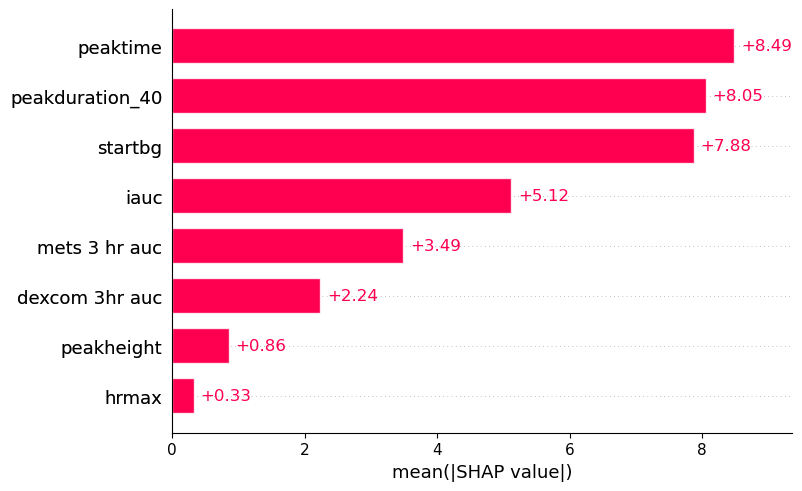

predicting carbs from peakheight to mets 3 hr avg:
RMSRE: 0.2954795


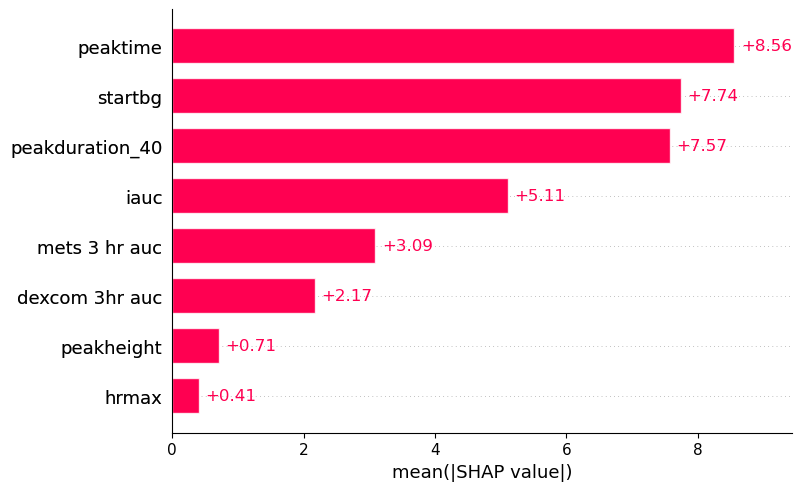

predicting calories from peakheight to mets 3 hr avg:
RMSRE: 0.333705


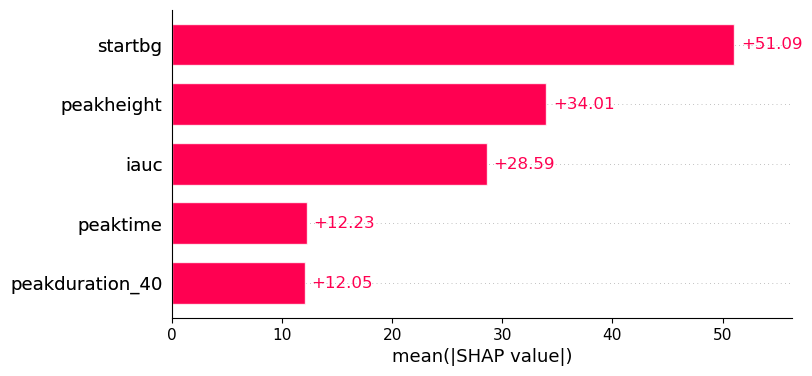

predicting calories from peakheight to mets 3 hr avg:
RMSRE: 0.333705


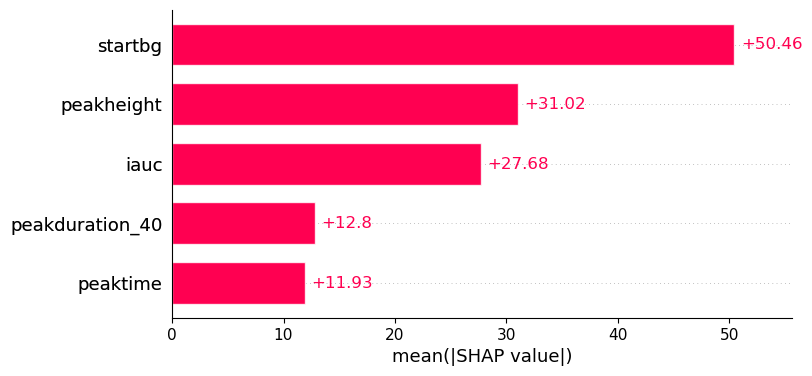

predicting calories from peakheight to mets 3 hr avg:
RMSRE: 0.333411


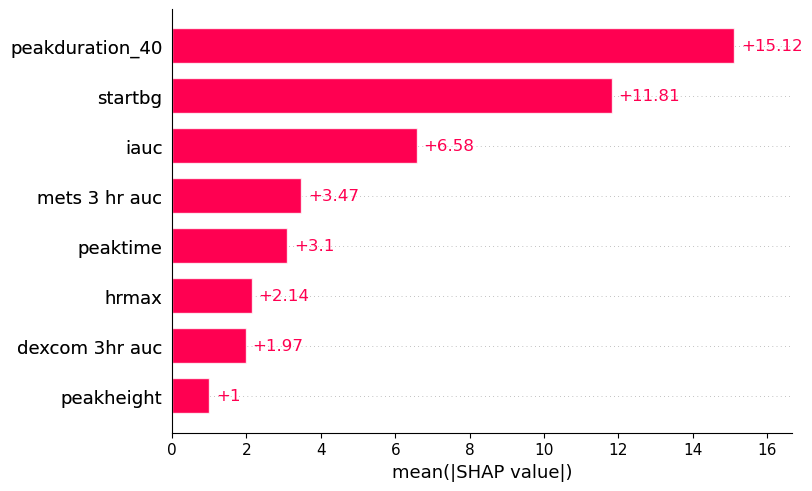

predicting calories from peakheight to mets 3 hr avg:
RMSRE: 0.333411


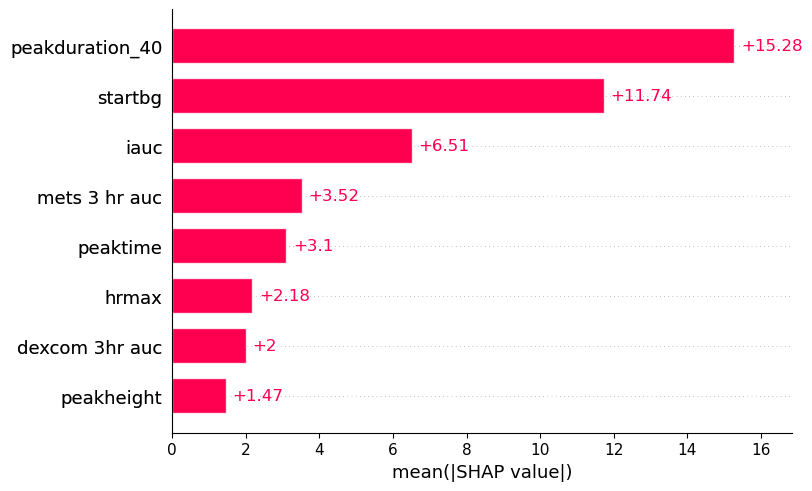

predicting peakheight from mets 3 hr auc to fat:
RMSRE: 0.2373579


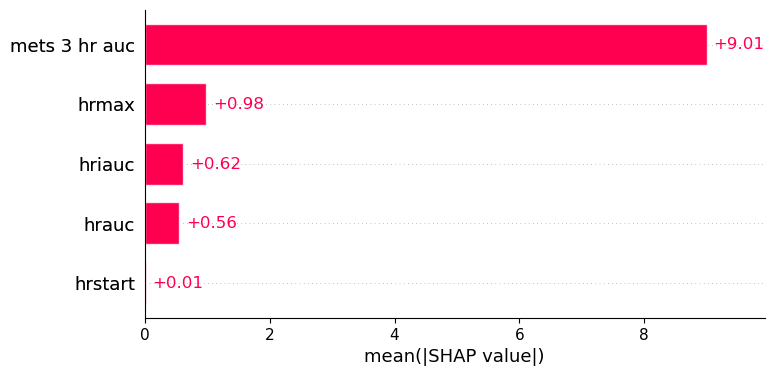

predicting peakheight from mets 3 hr auc to fat:
RMSRE: 0.2373579


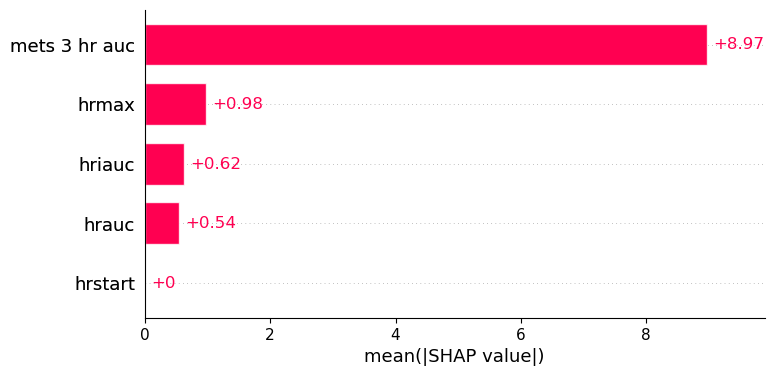

predicting peakheight from mets 3 hr auc to fat:
RMSRE: 0.2250765


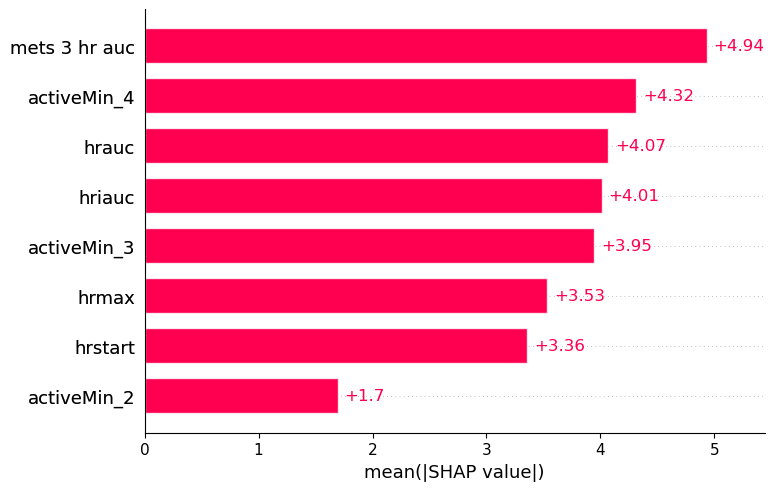

predicting peakheight from mets 3 hr auc to fat:
RMSRE: 0.2250765


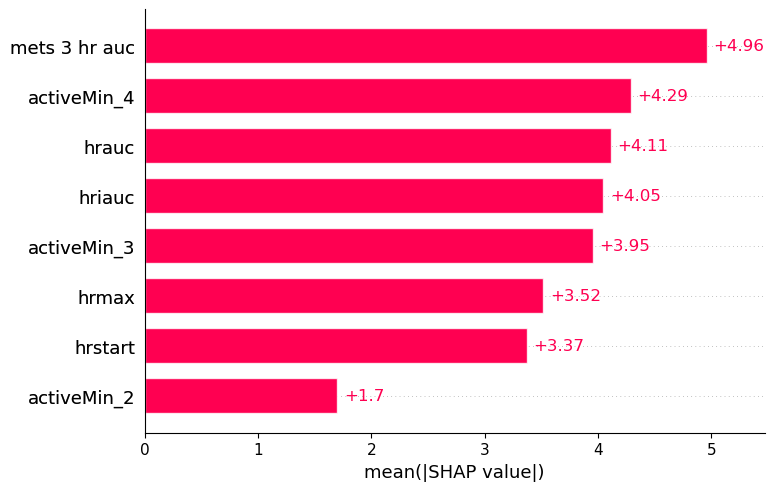

predicting dexcom 3hr auc from mets 3 hr auc to fat:
RMSRE: 0.1361499


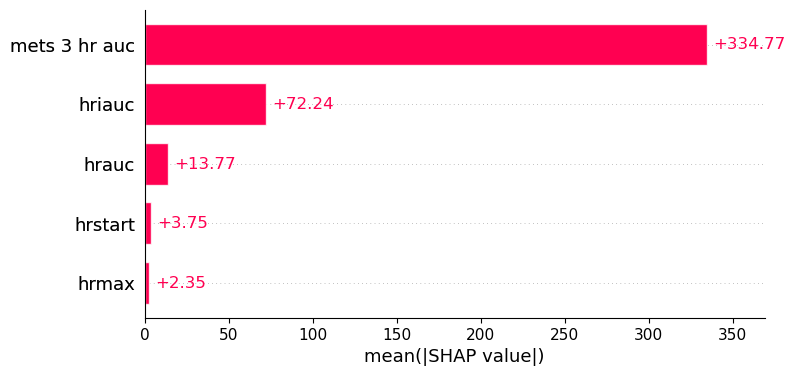

predicting dexcom 3hr auc from mets 3 hr auc to fat:
RMSRE: 0.1361499


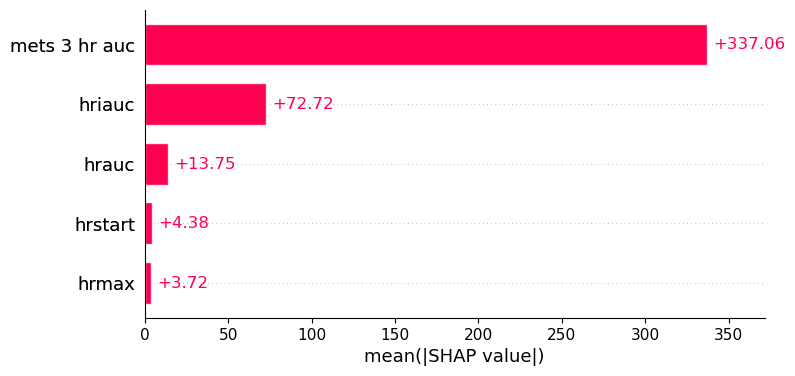

predicting dexcom 3hr auc from mets 3 hr auc to fat:
RMSRE: 0.1295377


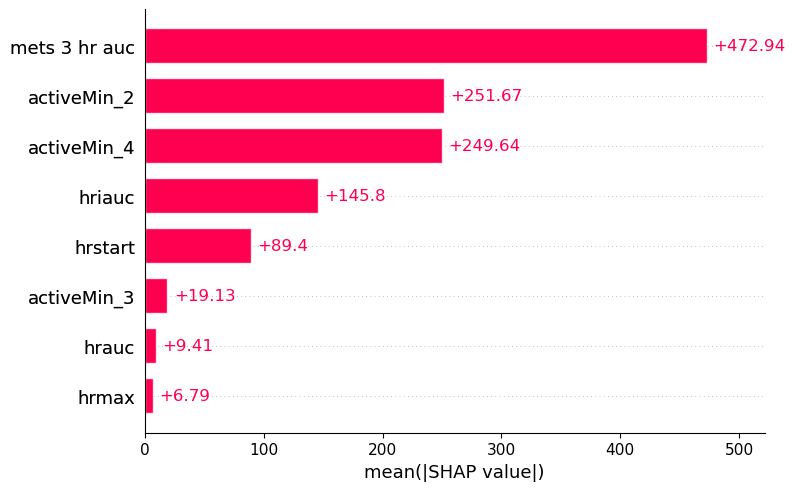

predicting dexcom 3hr auc from mets 3 hr auc to fat:
RMSRE: 0.1295377


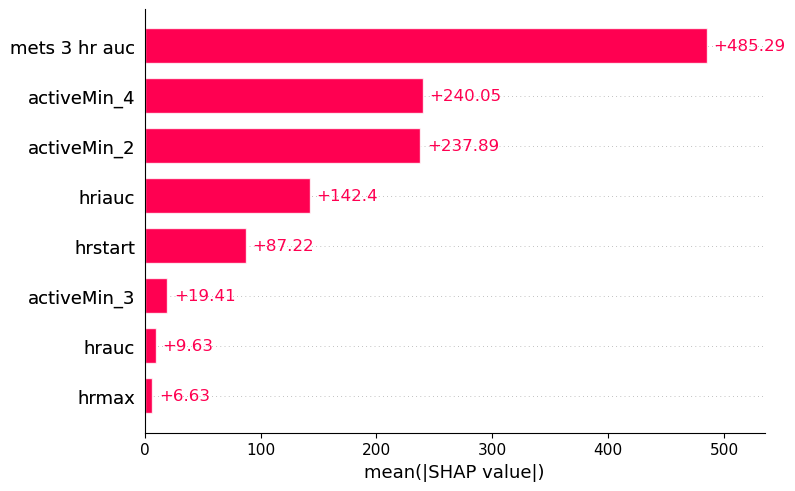

predicting iauc from mets 3 hr auc to fat:
RMSRE: 0.4298964


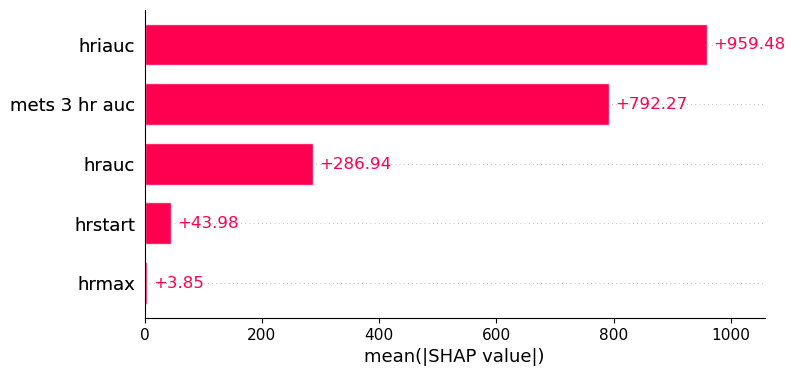

predicting iauc from mets 3 hr auc to fat:
RMSRE: 0.4298964


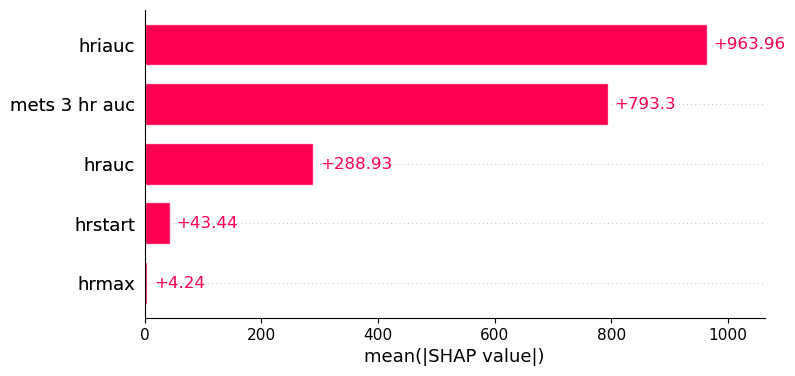

predicting iauc from mets 3 hr auc to fat:
RMSRE: 0.5031716


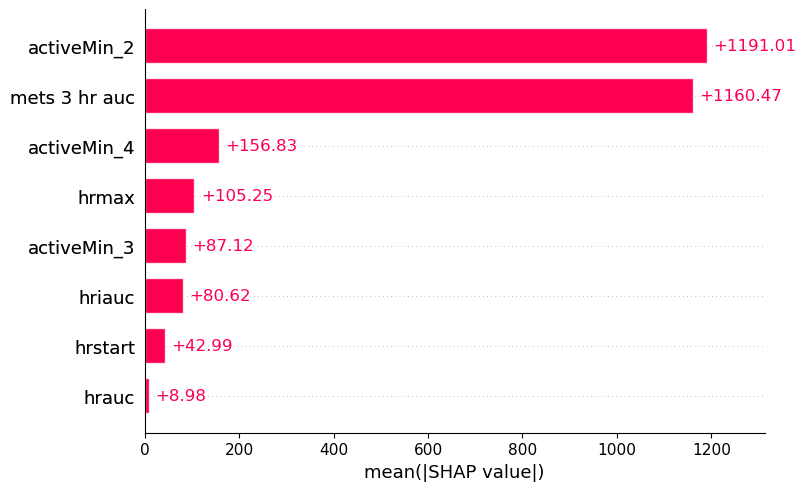

predicting iauc from mets 3 hr auc to fat:
RMSRE: 0.5031716


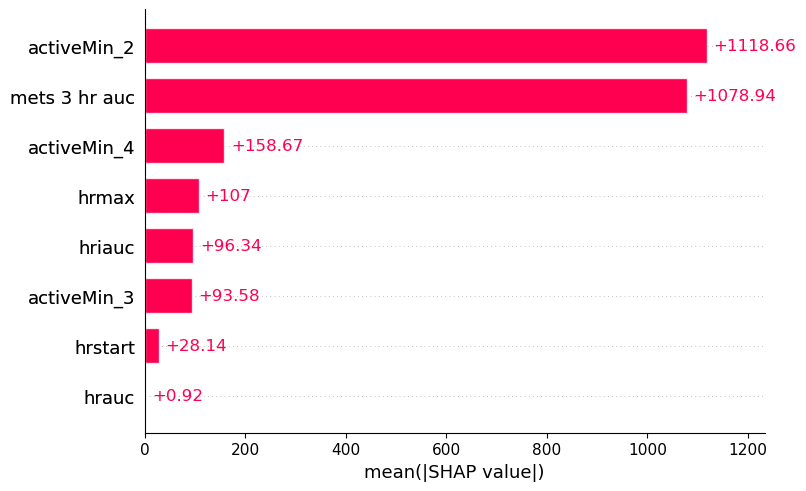

predicting peaktime from mets 3 hr auc to fat:
RMSRE: 0.2979098


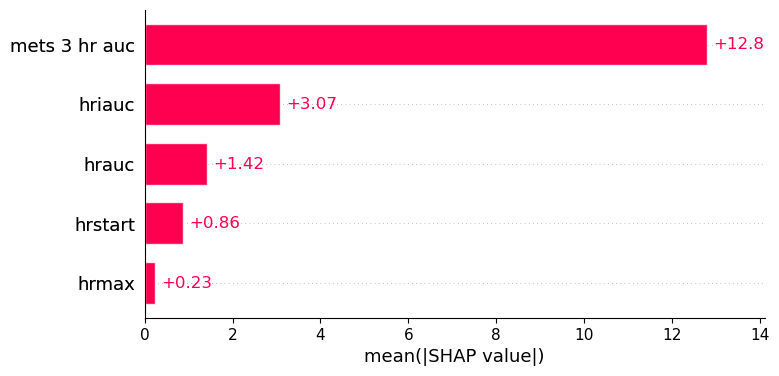

predicting peaktime from mets 3 hr auc to fat:
RMSRE: 0.2979098


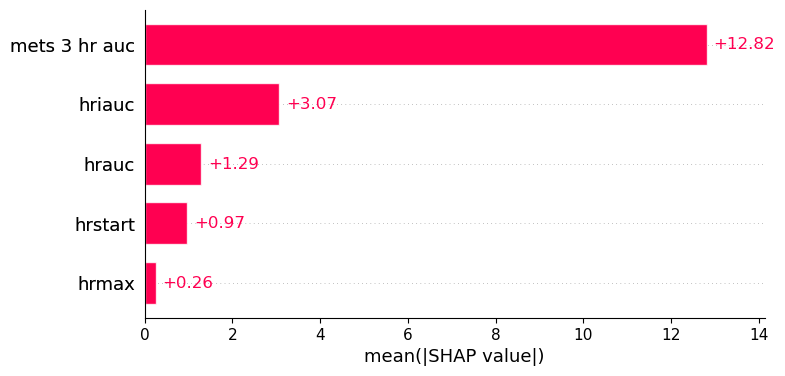

predicting peaktime from mets 3 hr auc to fat:
RMSRE: 0.2994988


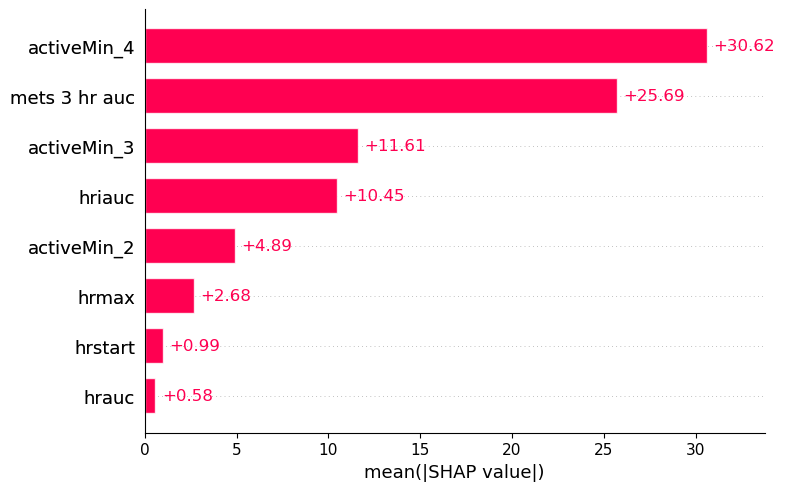

predicting peaktime from mets 3 hr auc to fat:
RMSRE: 0.2994988


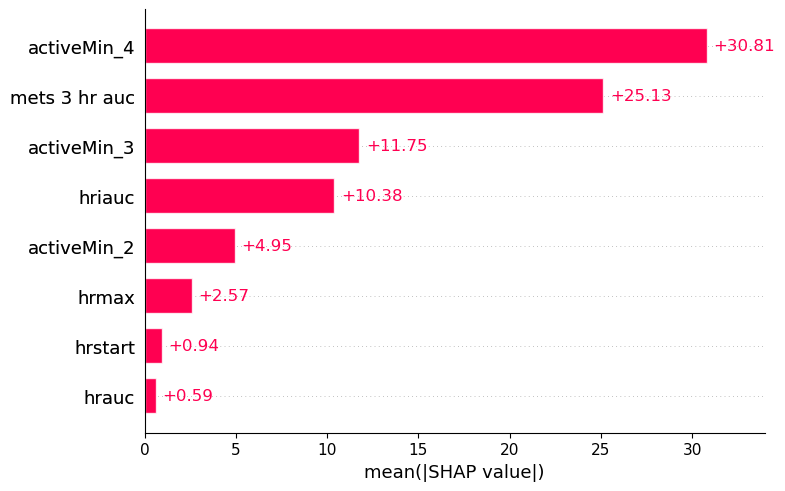

predicting peakduration_40 from mets 3 hr auc to fat:
RMSRE: 0.2503484


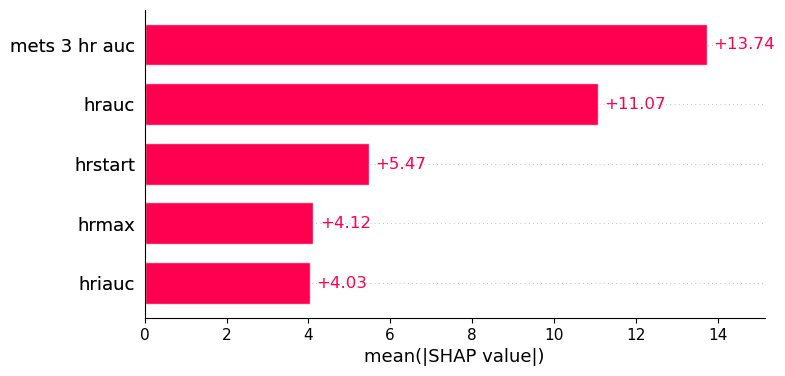

predicting peakduration_40 from mets 3 hr auc to fat:
RMSRE: 0.2503484


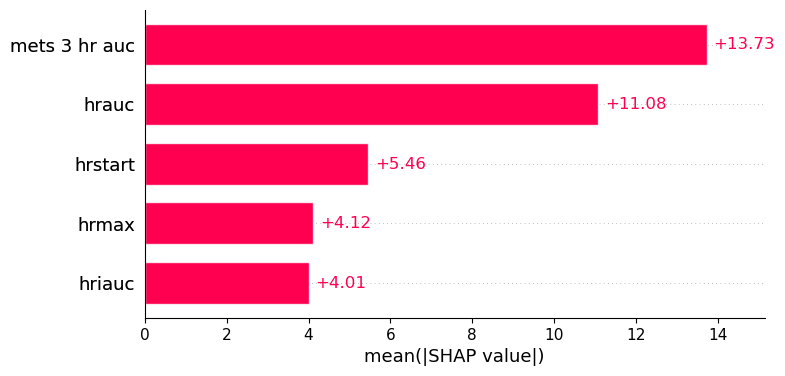

predicting peakduration_40 from mets 3 hr auc to fat:
RMSRE: 0.4547399


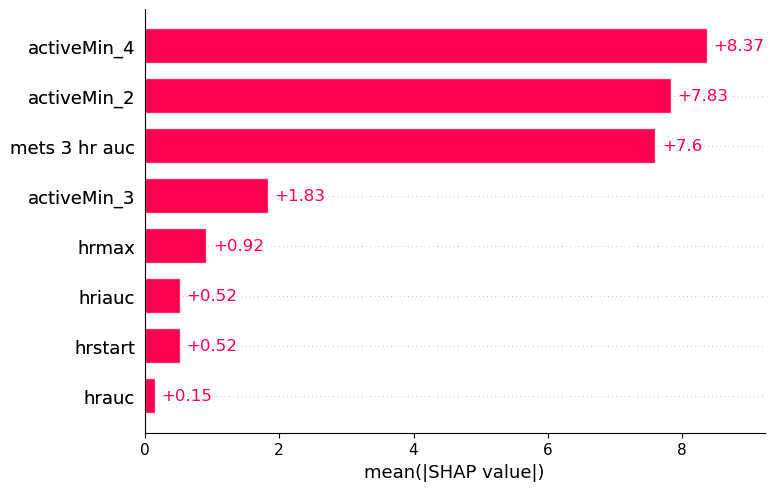

predicting peakduration_40 from mets 3 hr auc to fat:
RMSRE: 0.4547399


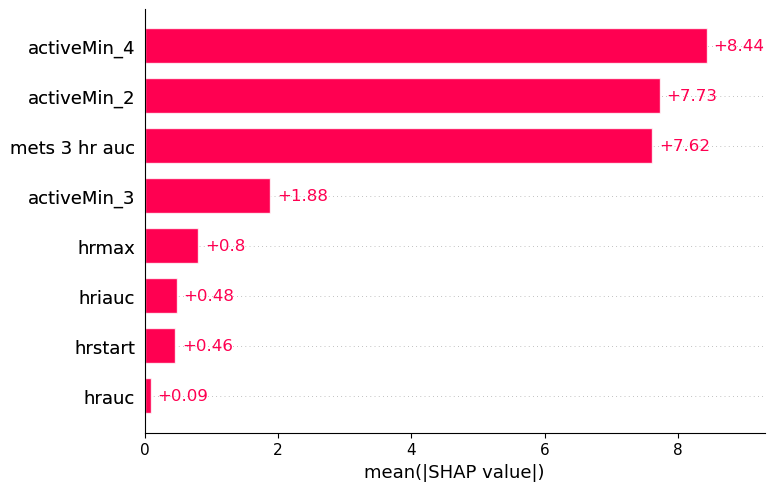

predicting startbg from mets 3 hr auc to fat:
RMSRE: 0.0292518


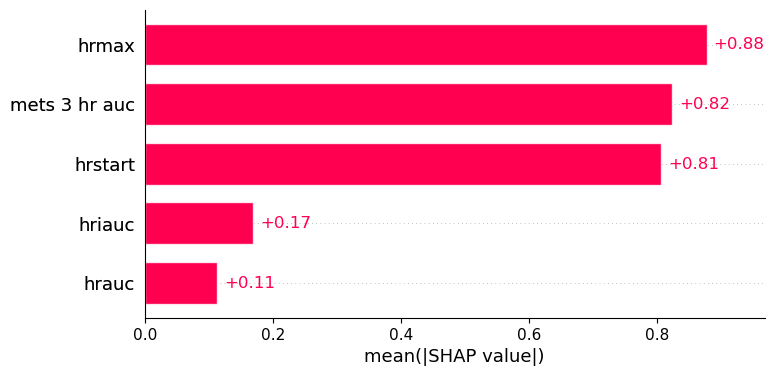

predicting startbg from mets 3 hr auc to fat:
RMSRE: 0.0292518


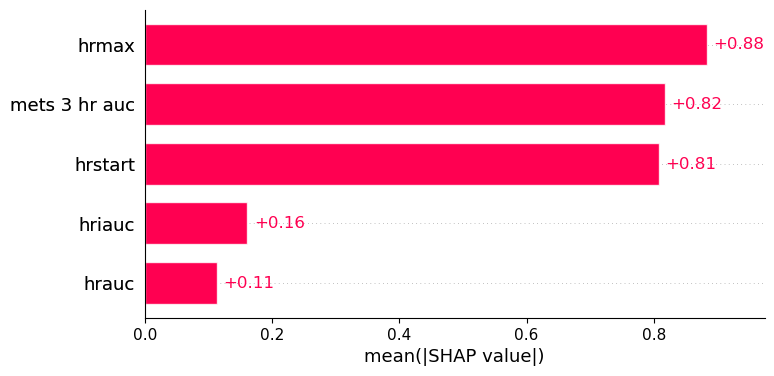

predicting startbg from mets 3 hr auc to fat:
RMSRE: 0.1920177


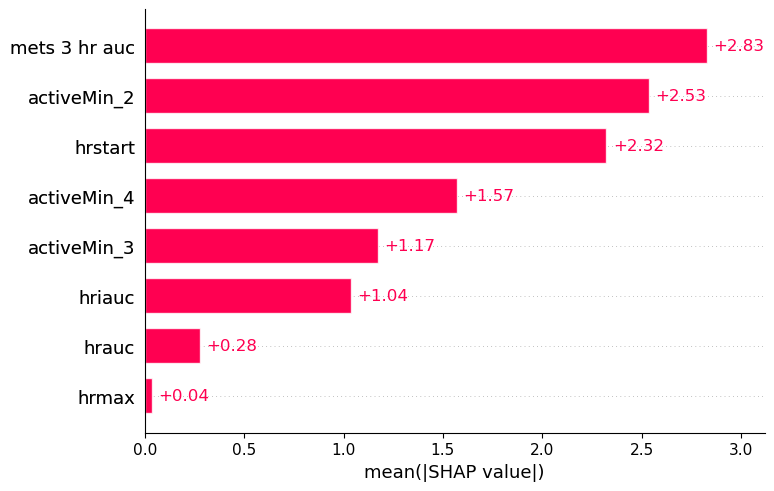

predicting startbg from mets 3 hr auc to fat:
RMSRE: 0.1920177


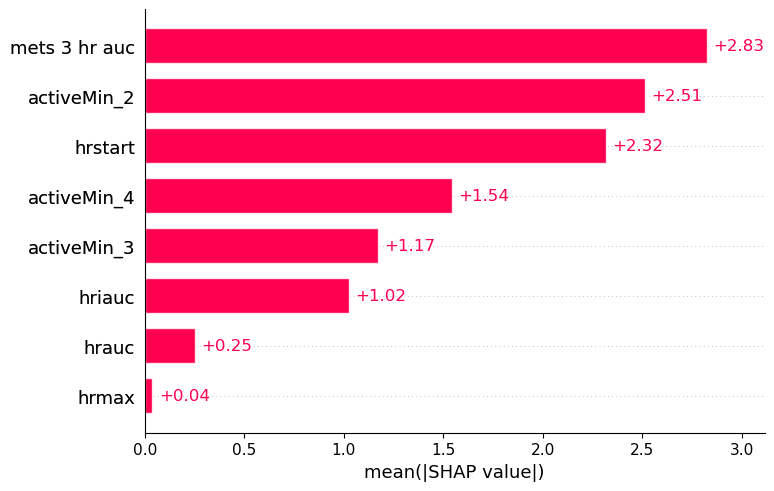

4
predicting carbs from peakheight to mets 3 hr avg:
RMSRE: 0.3260122


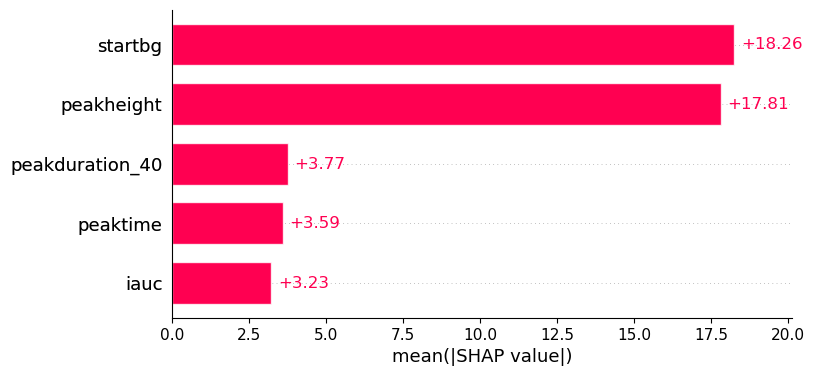

predicting carbs from peakheight to mets 3 hr avg:
RMSRE: 0.2407706


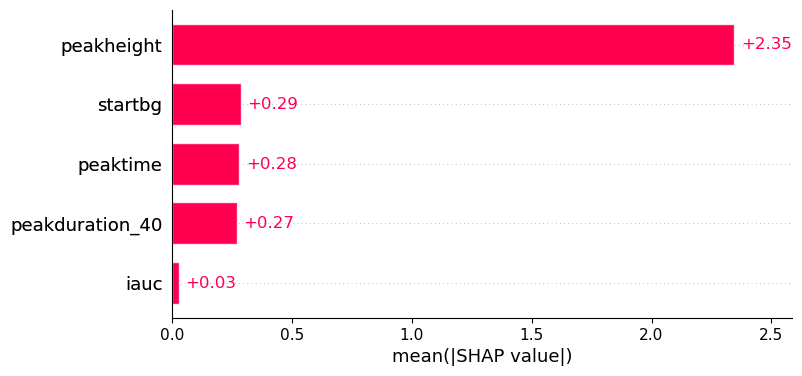

predicting carbs from peakheight to mets 3 hr avg:
RMSRE: 1.4376192


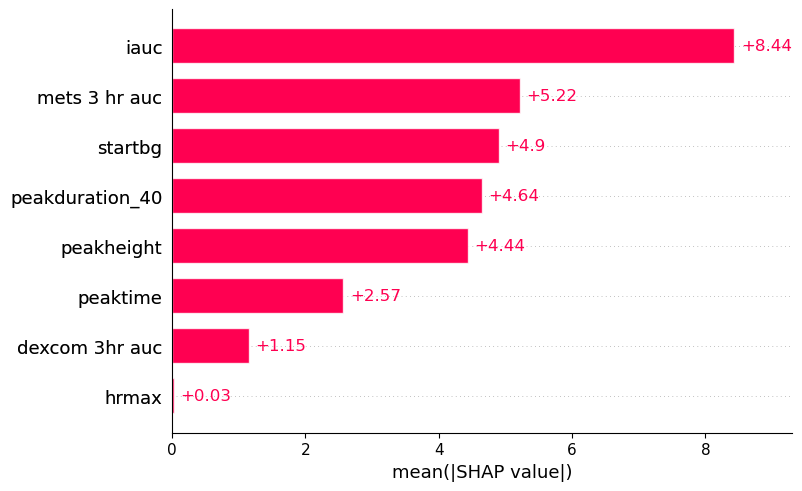

predicting carbs from peakheight to mets 3 hr avg:
RMSRE: 1.2256705


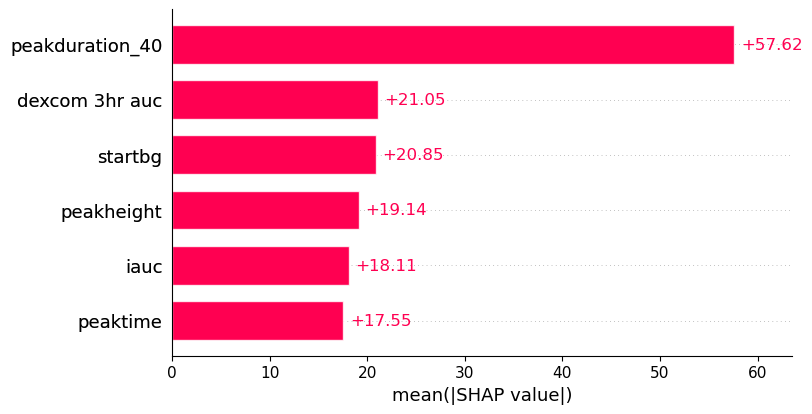

predicting calories from peakheight to mets 3 hr avg:
RMSRE: 0.3760212


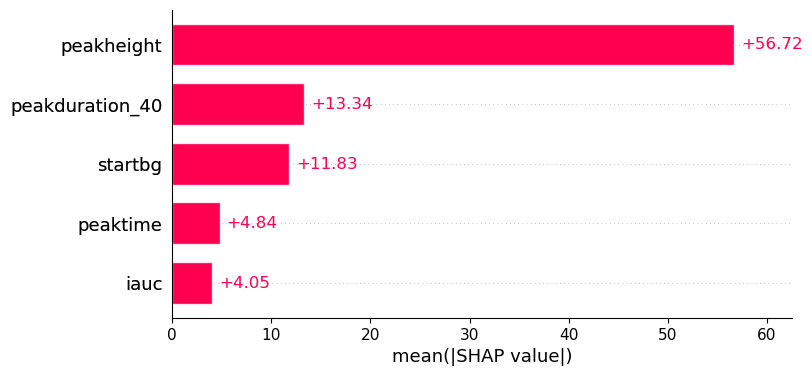

predicting calories from peakheight to mets 3 hr avg:
RMSRE: 0.5070822


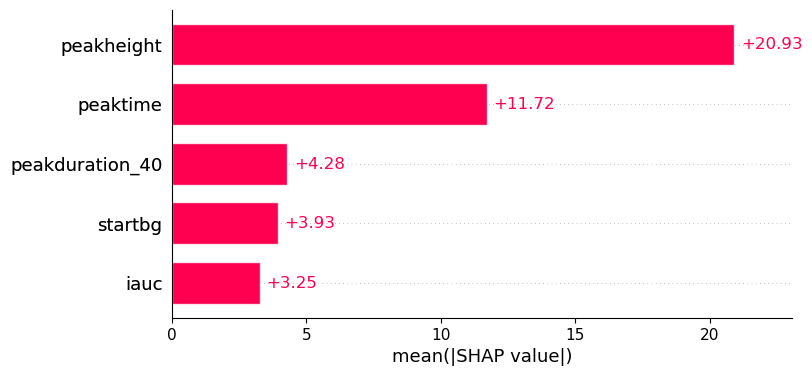

predicting calories from peakheight to mets 3 hr avg:
RMSRE: 1.111267


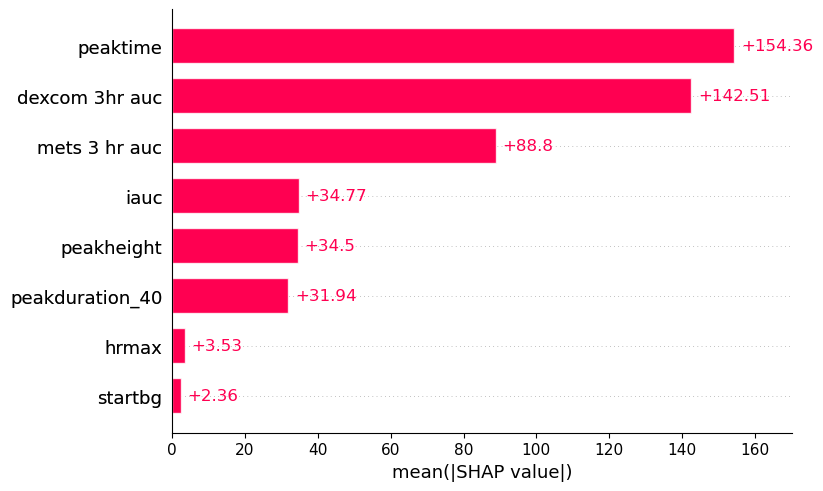

predicting calories from peakheight to mets 3 hr avg:
RMSRE: 0.8066186


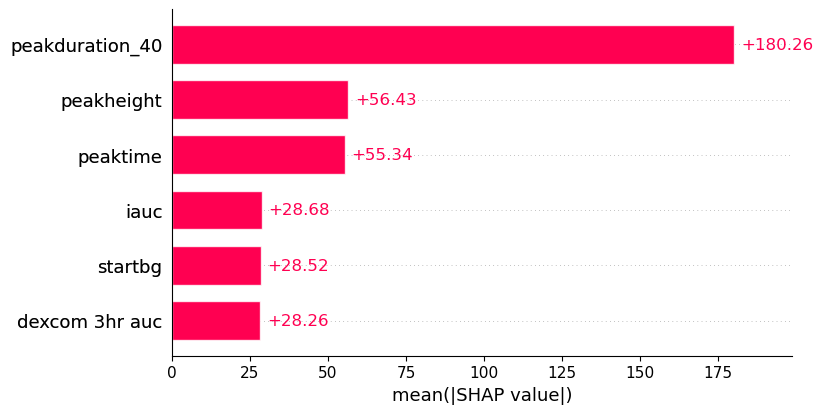

predicting peakheight from mets 3 hr auc to fat:
RMSRE: 0.1379894


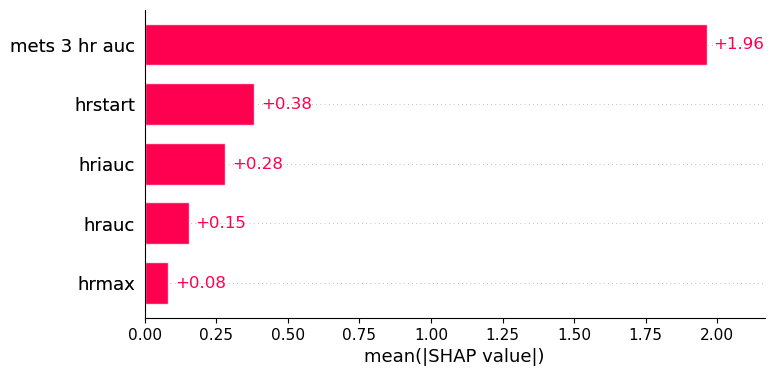

predicting peakheight from mets 3 hr auc to fat:
RMSRE: 0.1738834


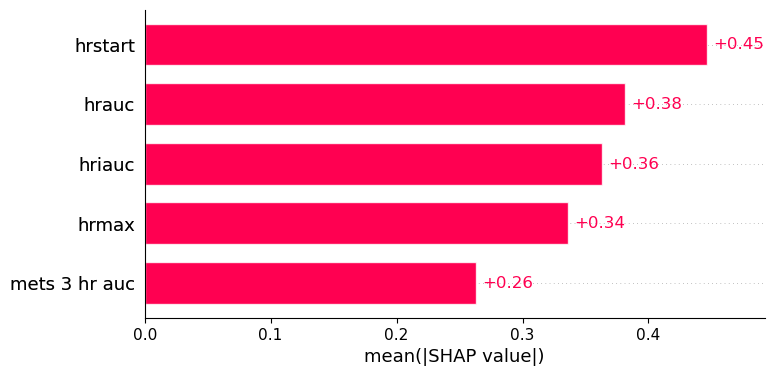

predicting peakheight from mets 3 hr auc to fat:
RMSRE: 0.1508052


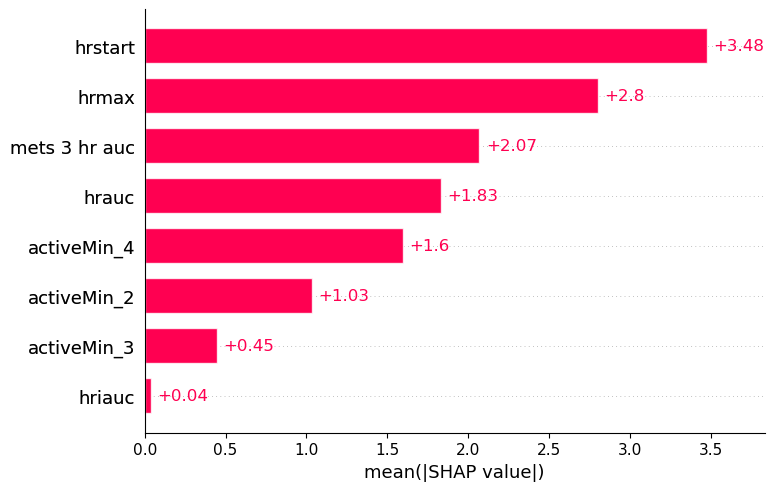

predicting peakheight from mets 3 hr auc to fat:
RMSRE: 0.1907376


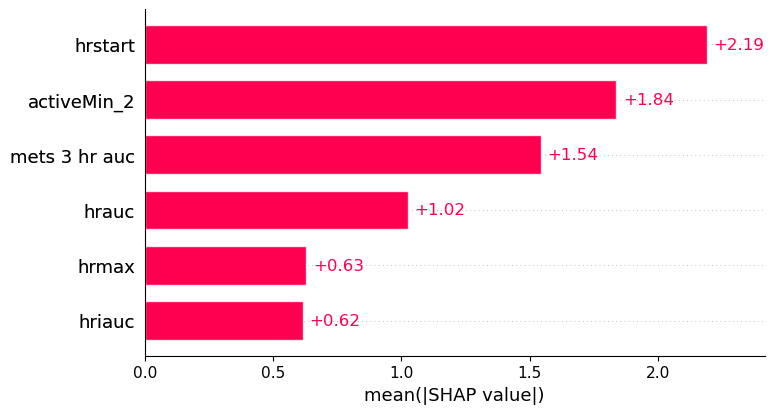

predicting dexcom 3hr auc from mets 3 hr auc to fat:
RMSRE: 0.085862


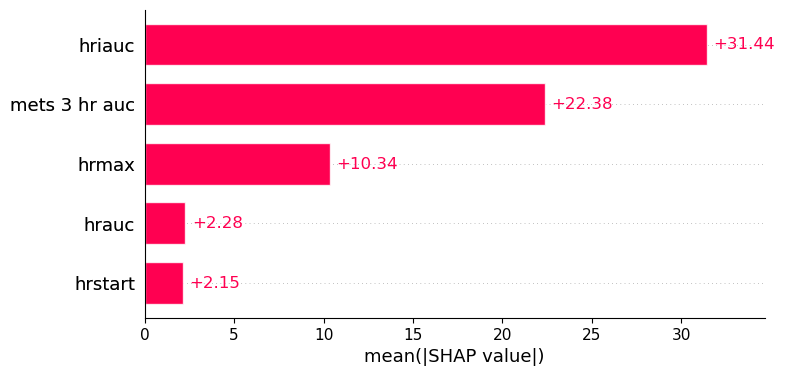

predicting dexcom 3hr auc from mets 3 hr auc to fat:
RMSRE: 0.0804722


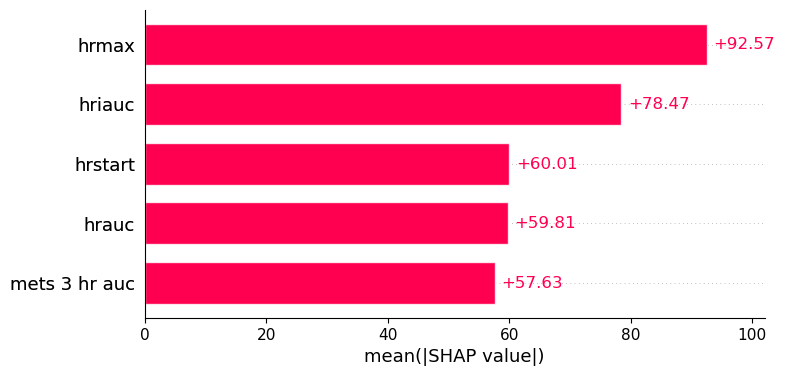

predicting dexcom 3hr auc from mets 3 hr auc to fat:
RMSRE: 0.131071


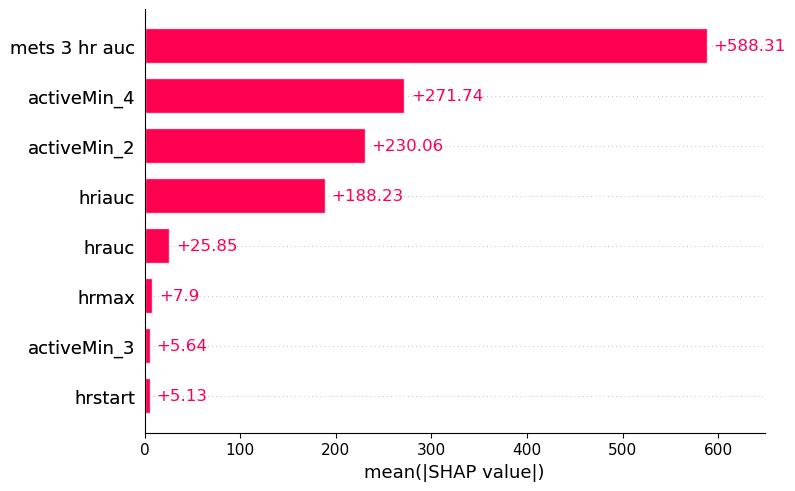

predicting dexcom 3hr auc from mets 3 hr auc to fat:
RMSRE: 0.1099332


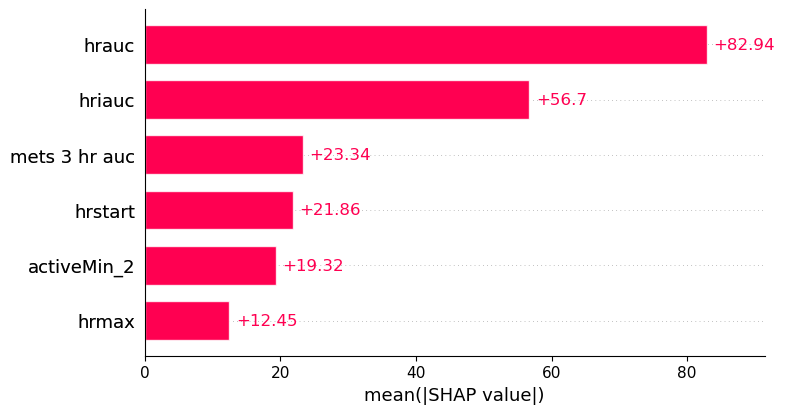

predicting iauc from mets 3 hr auc to fat:
RMSRE: 0.2282047


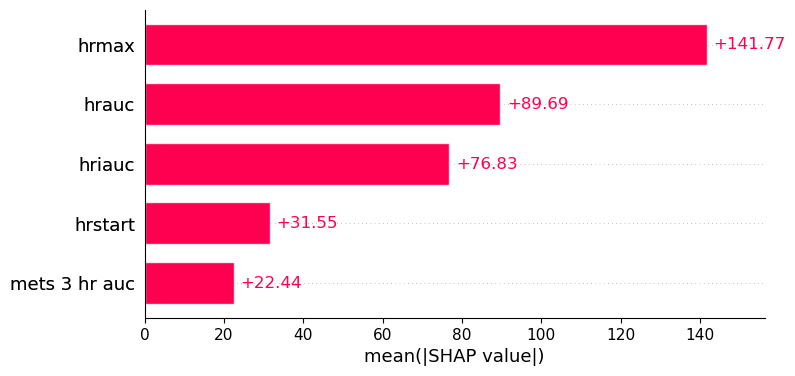

predicting iauc from mets 3 hr auc to fat:
RMSRE: 0.2248024


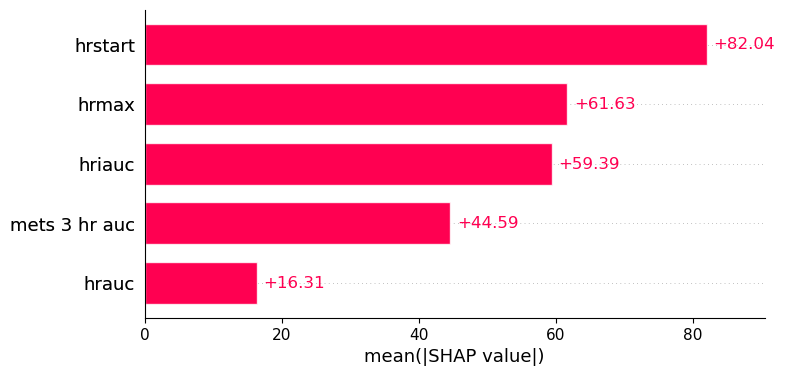

predicting iauc from mets 3 hr auc to fat:
RMSRE: 3.0244436


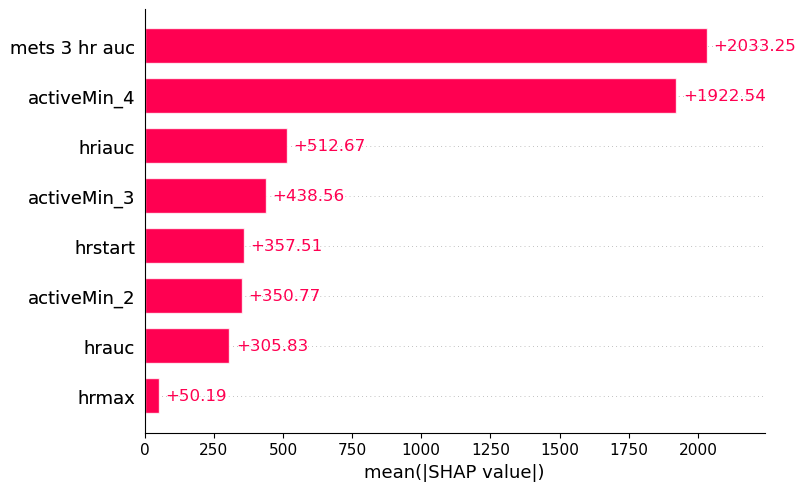

predicting iauc from mets 3 hr auc to fat:
RMSRE: 6.3514711


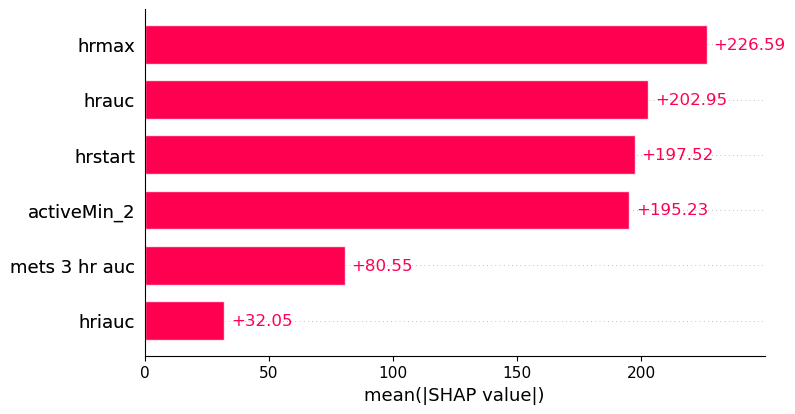

predicting peaktime from mets 3 hr auc to fat:
RMSRE: 0.9239736


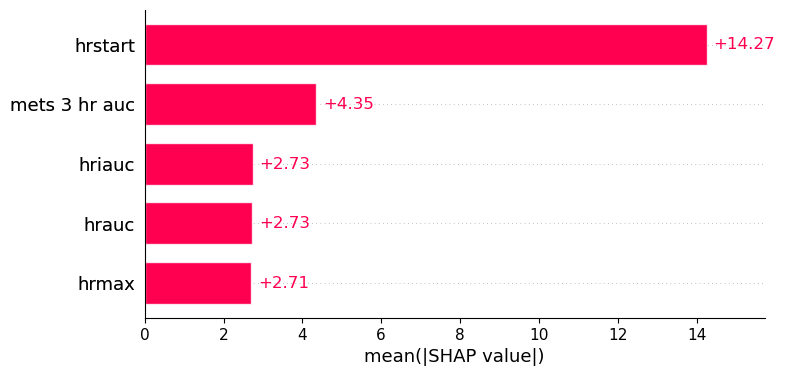

predicting peaktime from mets 3 hr auc to fat:
RMSRE: 0.5158904


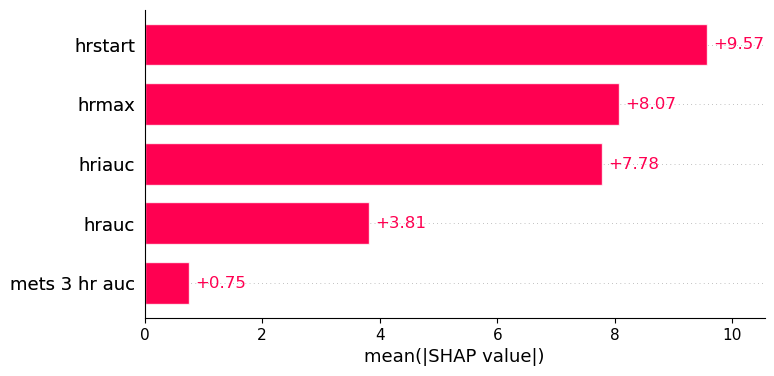

predicting peaktime from mets 3 hr auc to fat:
RMSRE: 0.3789132


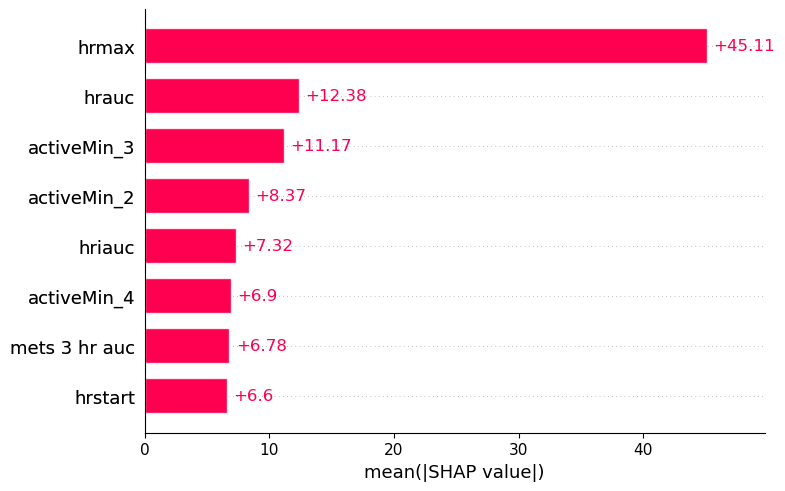

predicting peaktime from mets 3 hr auc to fat:
RMSRE: 0.5416856


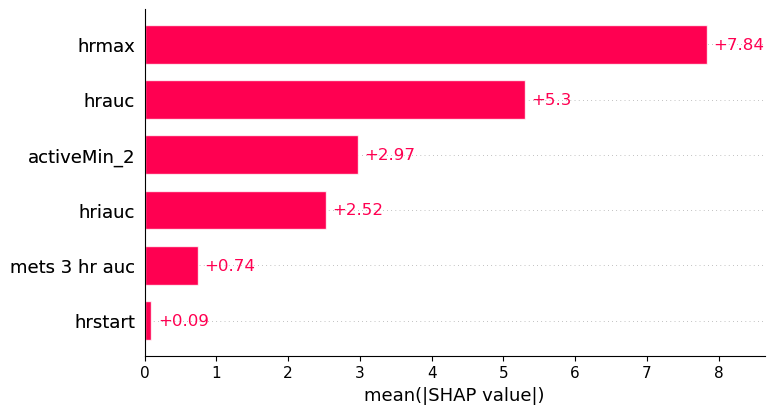

predicting peakduration_40 from mets 3 hr auc to fat:
RMSRE: 1.2711672


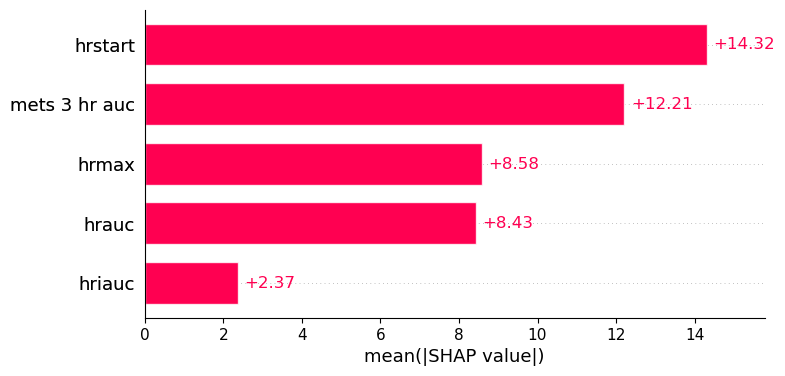

predicting peakduration_40 from mets 3 hr auc to fat:
RMSRE: 0.7183524


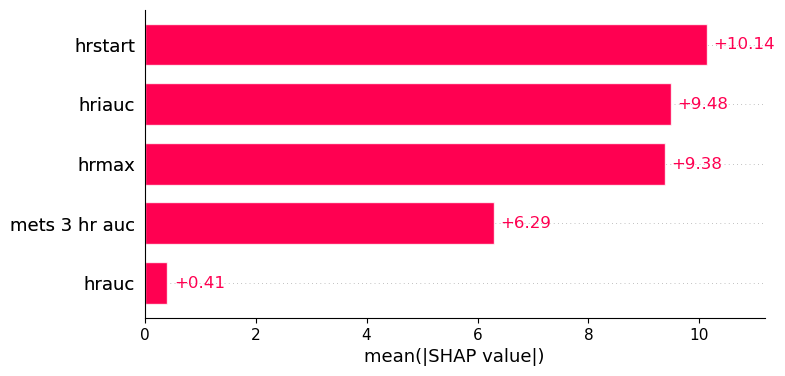

predicting peakduration_40 from mets 3 hr auc to fat:
RMSRE: 1.0351154


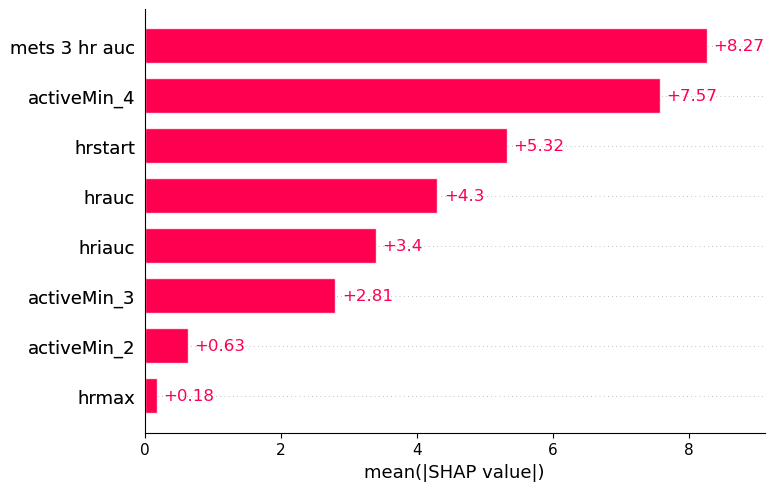

predicting peakduration_40 from mets 3 hr auc to fat:
RMSRE: 2.2130907


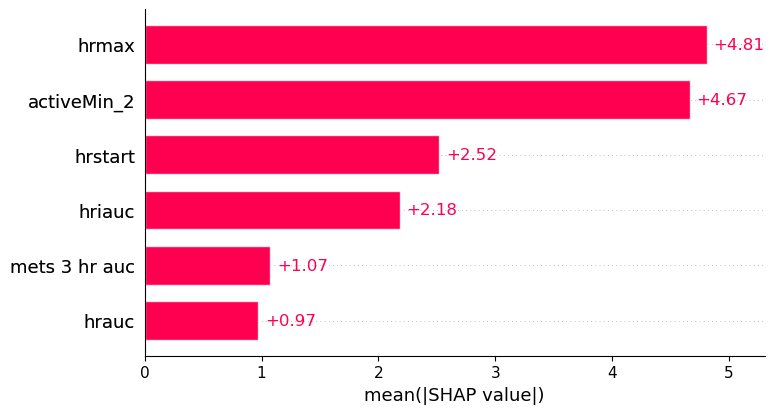

predicting startbg from mets 3 hr auc to fat:
RMSRE: 0.0779868


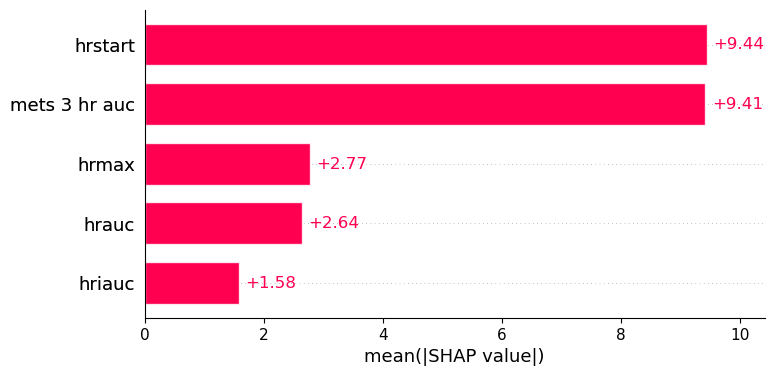

predicting startbg from mets 3 hr auc to fat:
RMSRE: 0.0993679


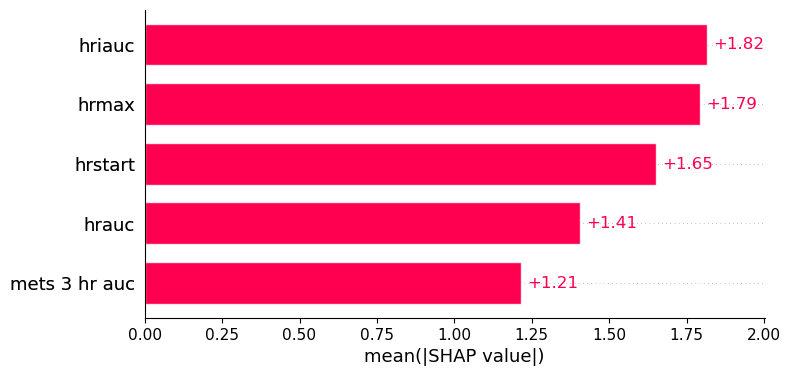

predicting startbg from mets 3 hr auc to fat:
RMSRE: 0.1406619


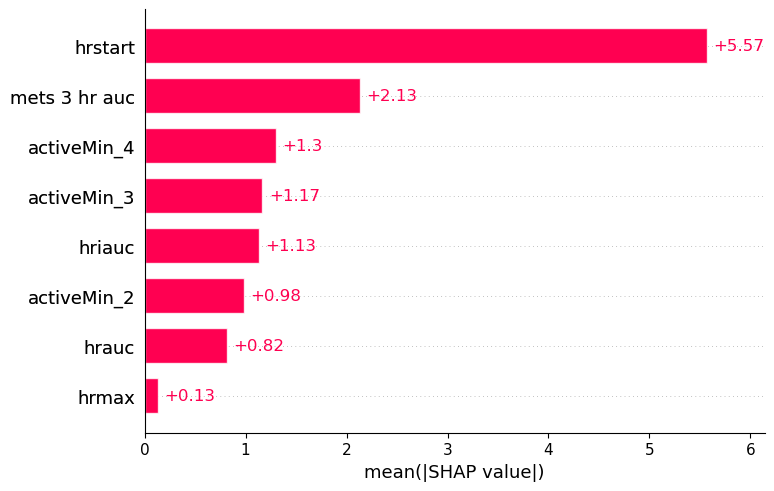

predicting startbg from mets 3 hr auc to fat:
RMSRE: 0.1412254


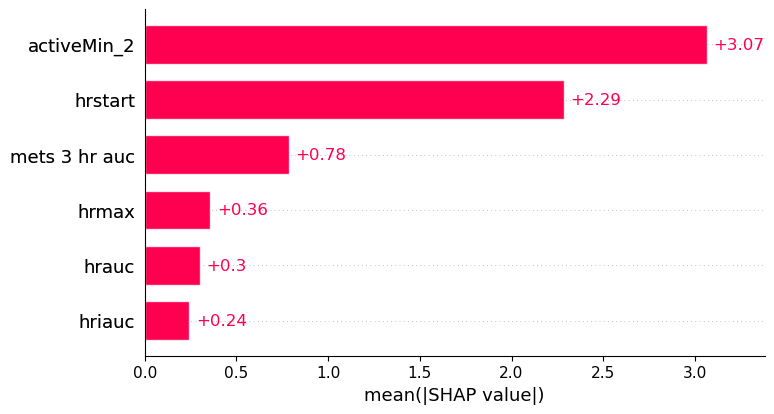

5
predicting carbs from peakheight to mets 3 hr avg:
RMSRE: 0.5372039


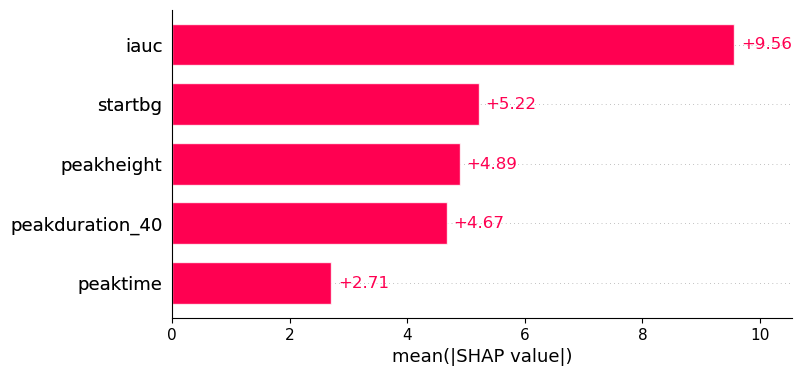

predicting carbs from peakheight to mets 3 hr avg:
RMSRE: 0.5372039


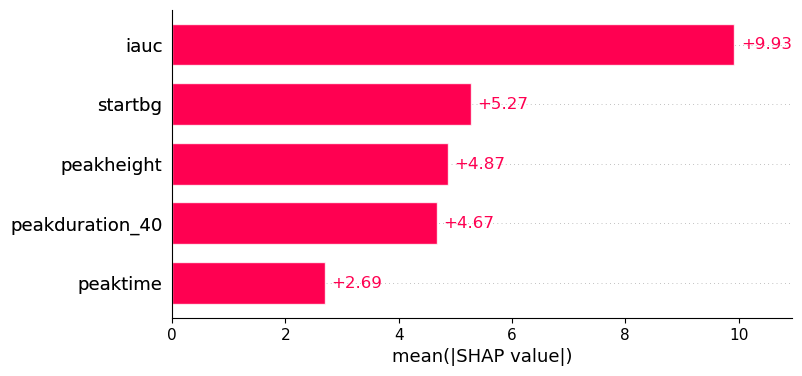

predicting carbs from peakheight to mets 3 hr avg:
RMSRE: 0.3873149


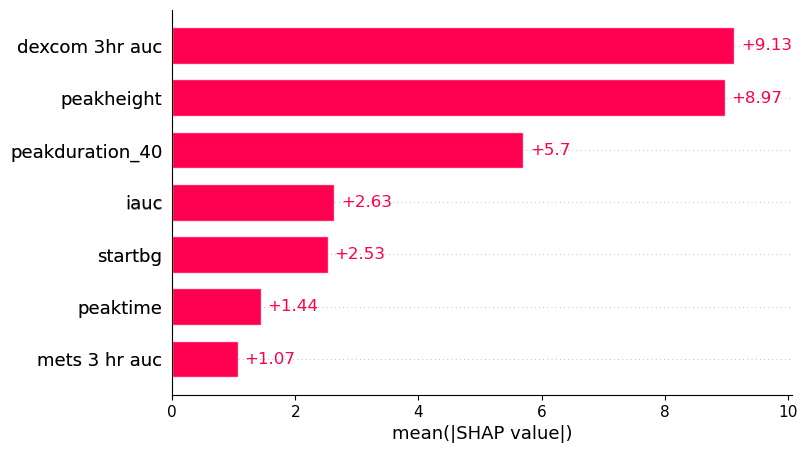

predicting carbs from peakheight to mets 3 hr avg:
RMSRE: 0.3770673


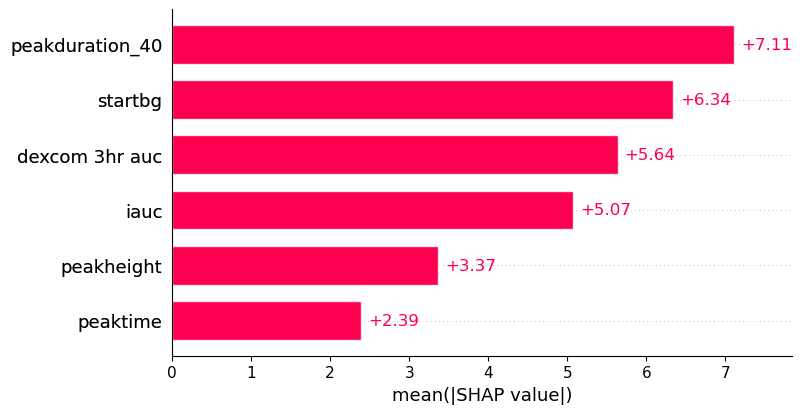

predicting calories from peakheight to mets 3 hr avg:
RMSRE: 0.4336769


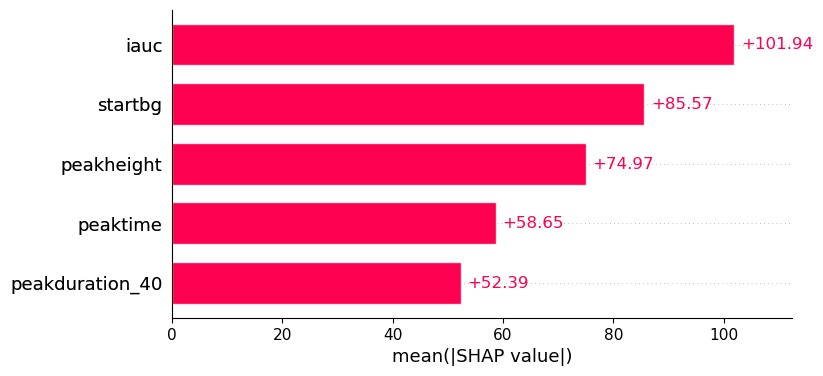

predicting calories from peakheight to mets 3 hr avg:
RMSRE: 0.4336769


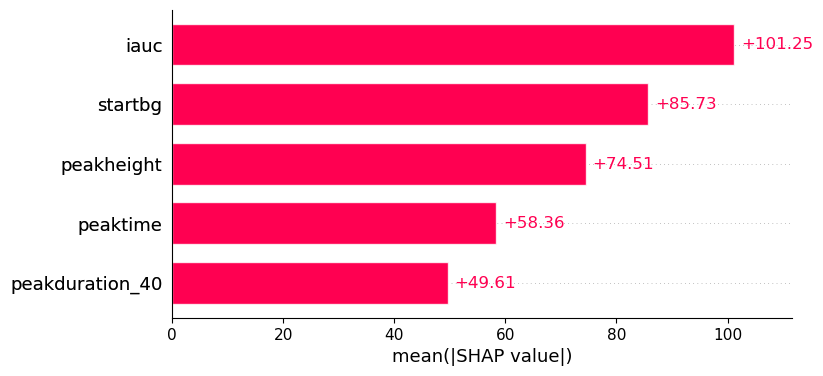

predicting calories from peakheight to mets 3 hr avg:
RMSRE: 0.2966374


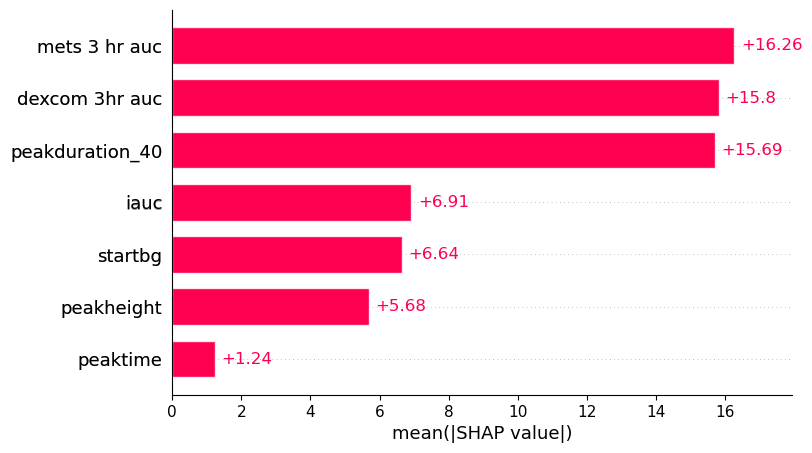

predicting calories from peakheight to mets 3 hr avg:
RMSRE: 0.284912


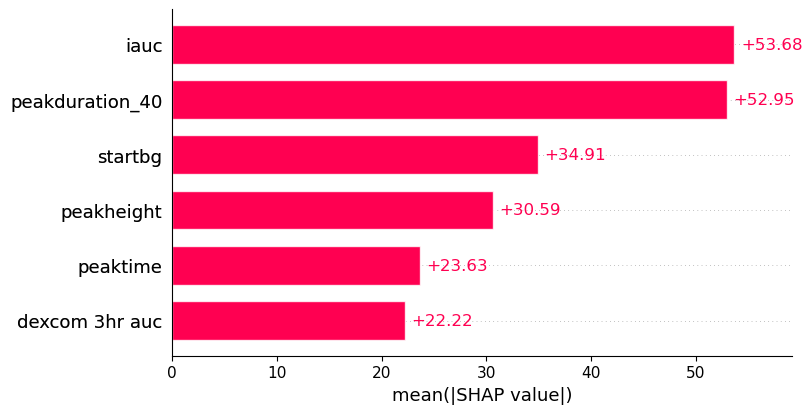

predicting peakheight from mets 3 hr auc to fat:
RMSRE: 0.4960448


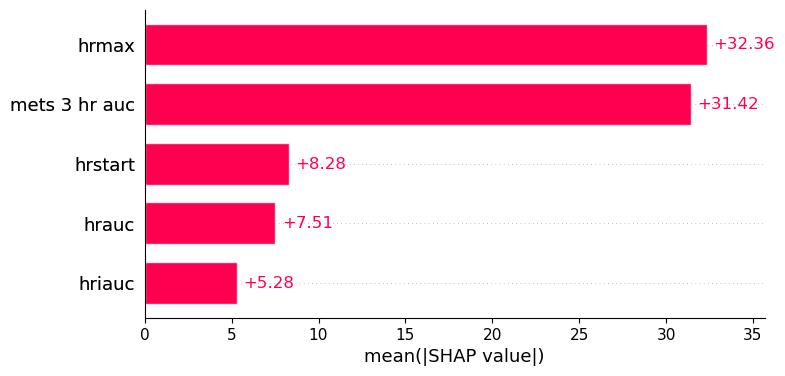

predicting peakheight from mets 3 hr auc to fat:
RMSRE: 0.4960448


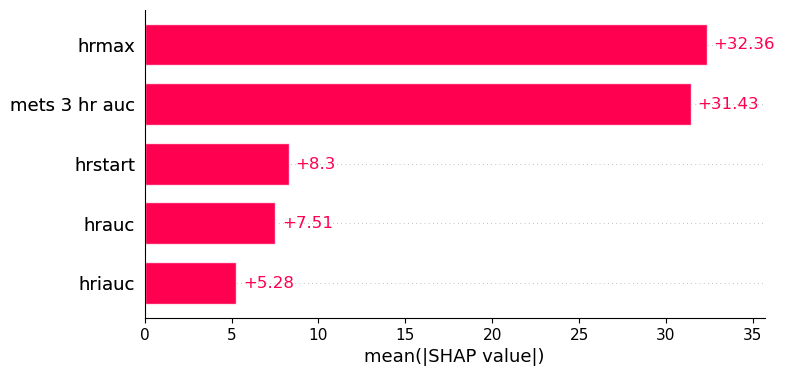

predicting peakheight from mets 3 hr auc to fat:
RMSRE: 0.1979758


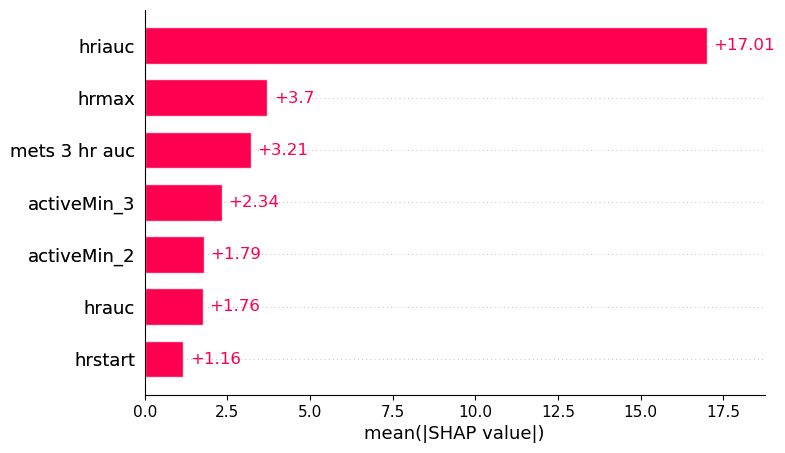

predicting peakheight from mets 3 hr auc to fat:
RMSRE: 0.2650665


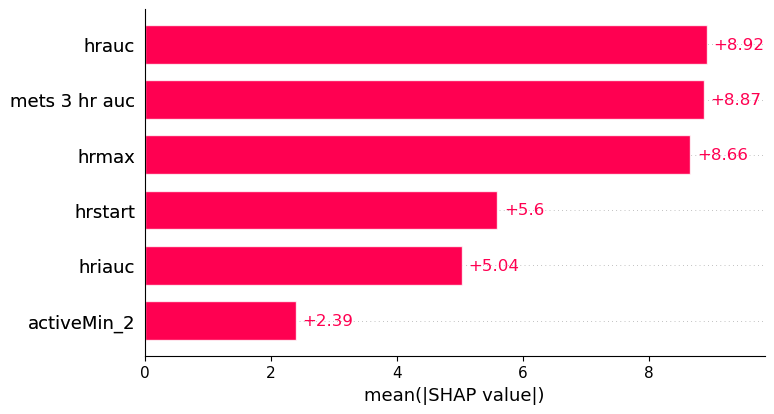

predicting dexcom 3hr auc from mets 3 hr auc to fat:
RMSRE: 0.4503307


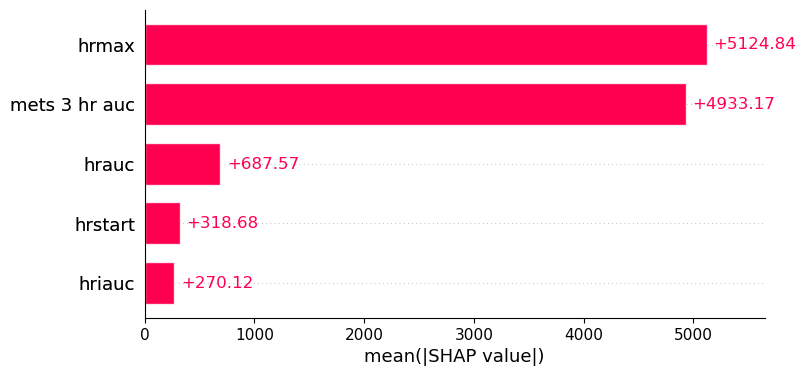

predicting dexcom 3hr auc from mets 3 hr auc to fat:
RMSRE: 0.4503307


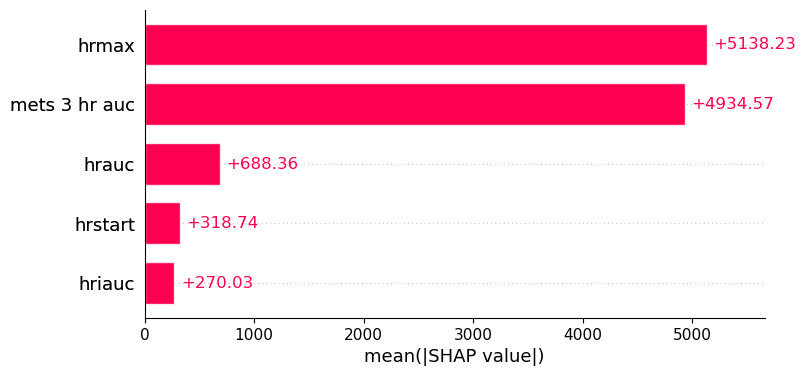

predicting dexcom 3hr auc from mets 3 hr auc to fat:
RMSRE: 0.1599796


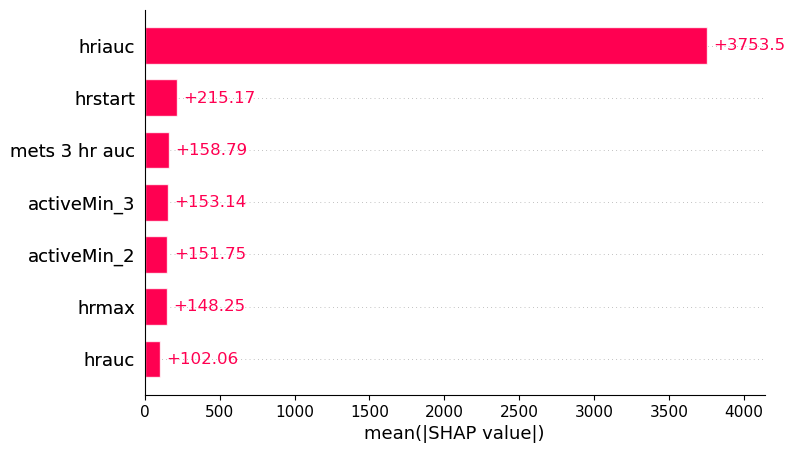

predicting dexcom 3hr auc from mets 3 hr auc to fat:
RMSRE: 0.2097004


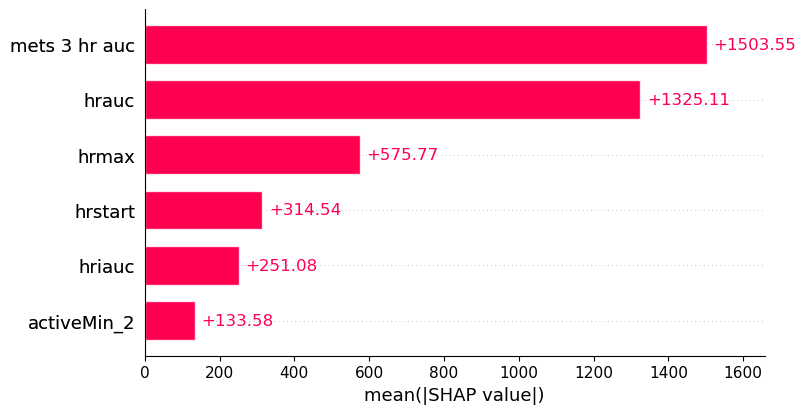

predicting iauc from mets 3 hr auc to fat:
RMSRE: 1.5474886


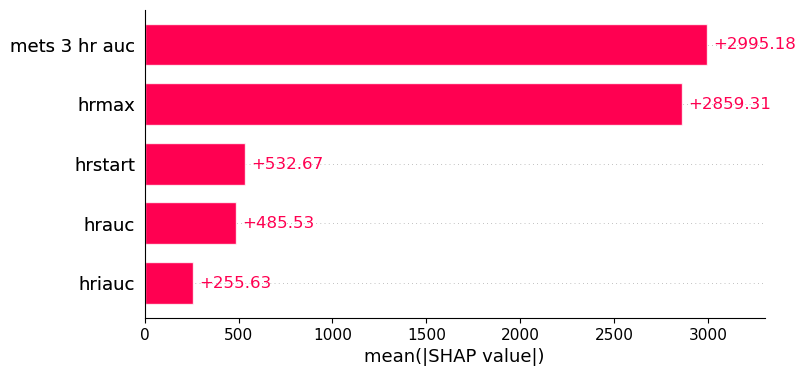

predicting iauc from mets 3 hr auc to fat:
RMSRE: 1.5474886


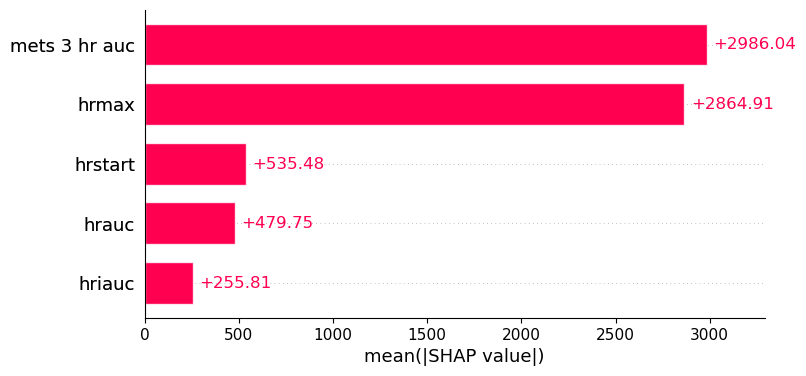

predicting iauc from mets 3 hr auc to fat:
RMSRE: 0.4828856


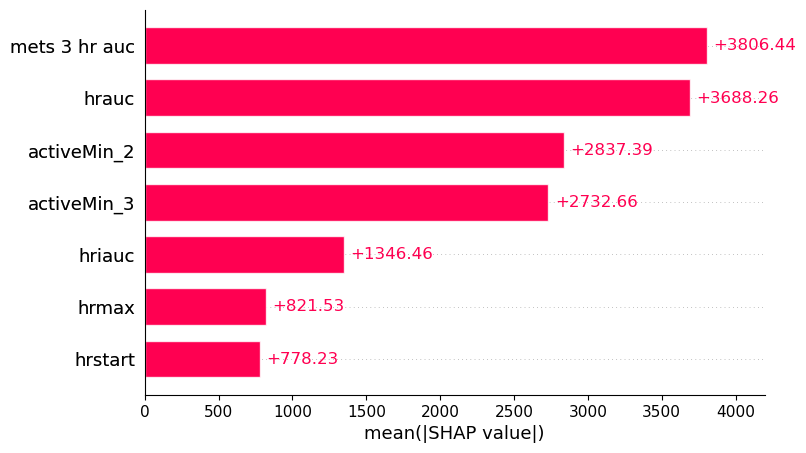

predicting iauc from mets 3 hr auc to fat:
RMSRE: 1.2137164


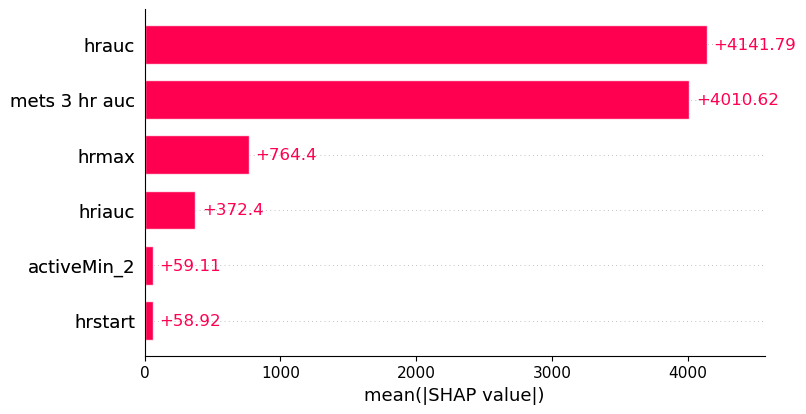

predicting peaktime from mets 3 hr auc to fat:
RMSRE: inf


divide by zero encountered in divide


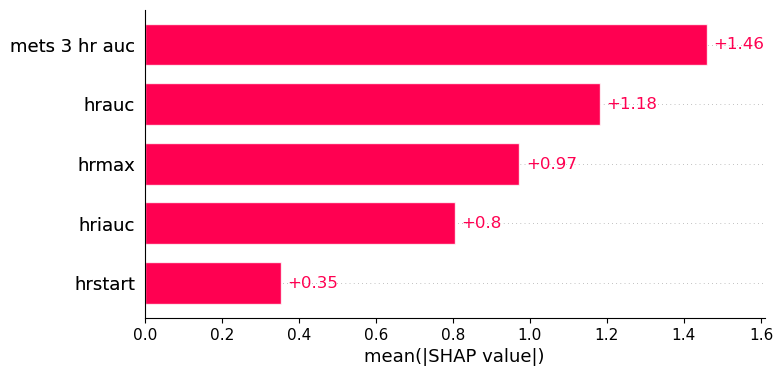

predicting peaktime from mets 3 hr auc to fat:
RMSRE: inf


divide by zero encountered in divide


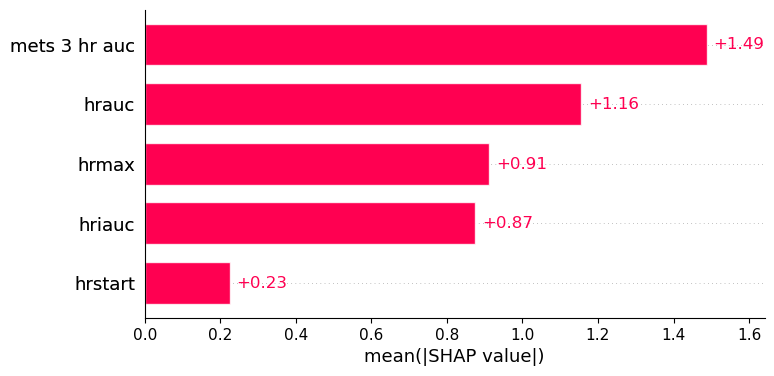

predicting peaktime from mets 3 hr auc to fat:
RMSRE: 0.1501617


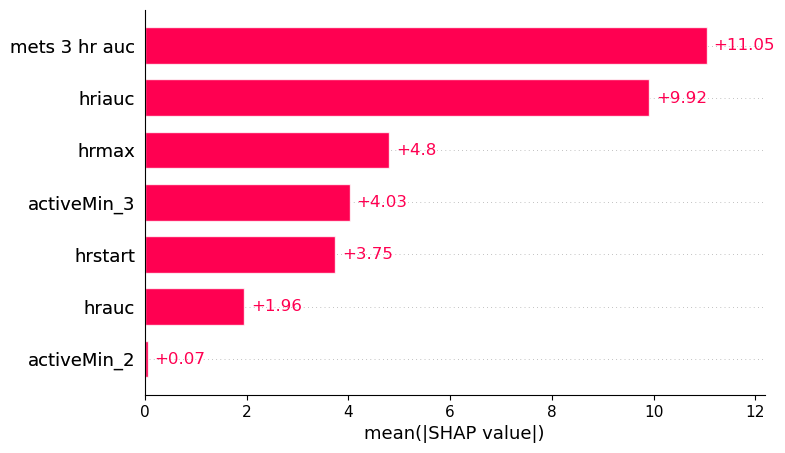

predicting peaktime from mets 3 hr auc to fat:
RMSRE: 0.373268


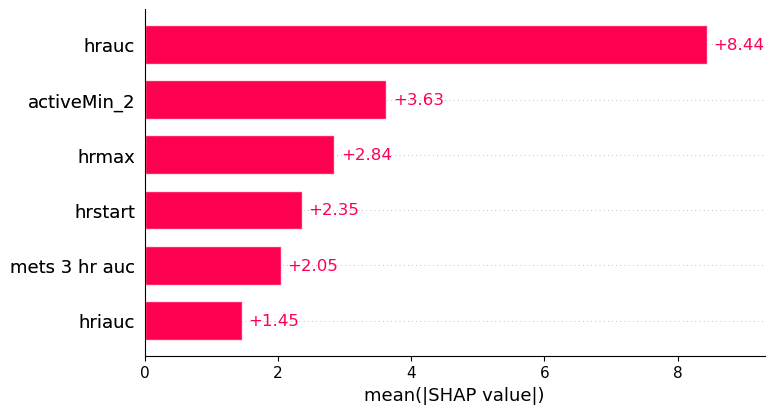

predicting peakduration_40 from mets 3 hr auc to fat:
RMSRE: inf


divide by zero encountered in divide


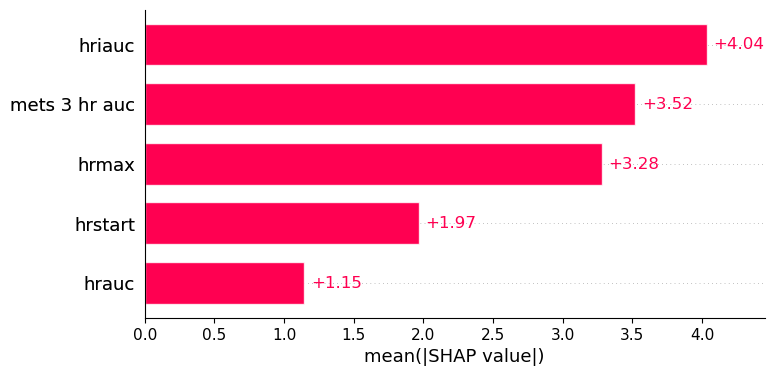

predicting peakduration_40 from mets 3 hr auc to fat:
RMSRE: inf


divide by zero encountered in divide


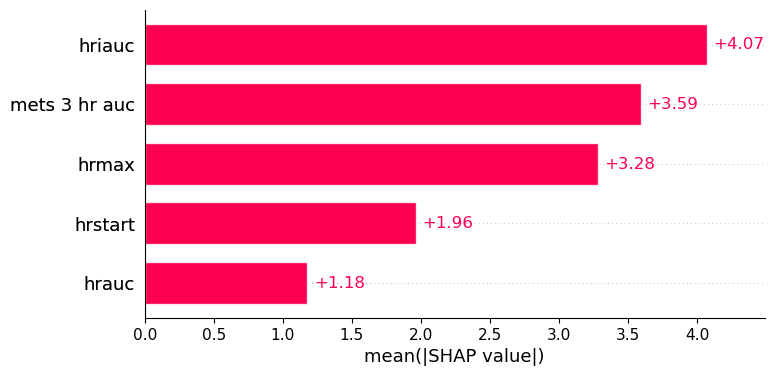

predicting peakduration_40 from mets 3 hr auc to fat:
RMSRE: 0.4923357


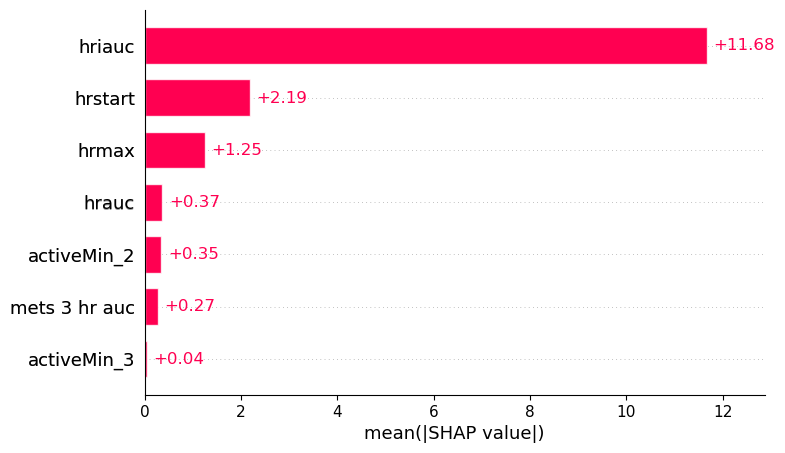

predicting peakduration_40 from mets 3 hr auc to fat:
RMSRE: 0.5129507


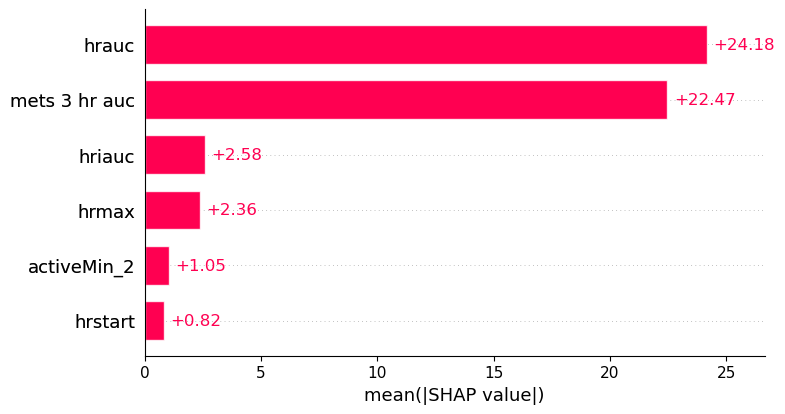

predicting startbg from mets 3 hr auc to fat:
RMSRE: 0.1779295


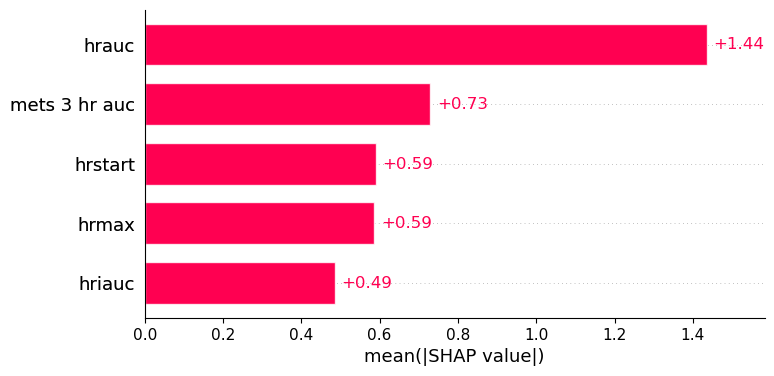

predicting startbg from mets 3 hr auc to fat:
RMSRE: 0.1779295


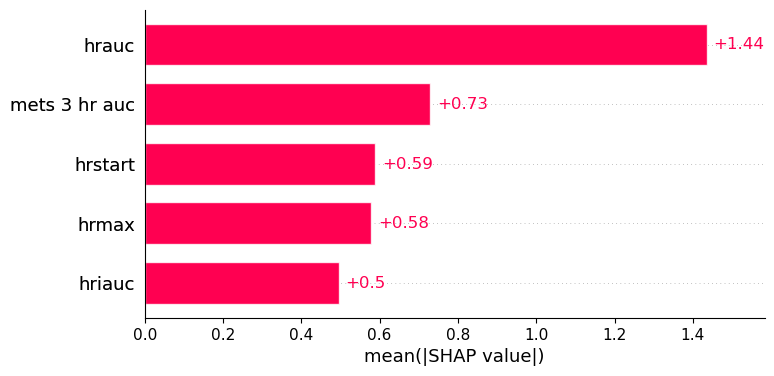

predicting startbg from mets 3 hr auc to fat:
RMSRE: 0.1345422


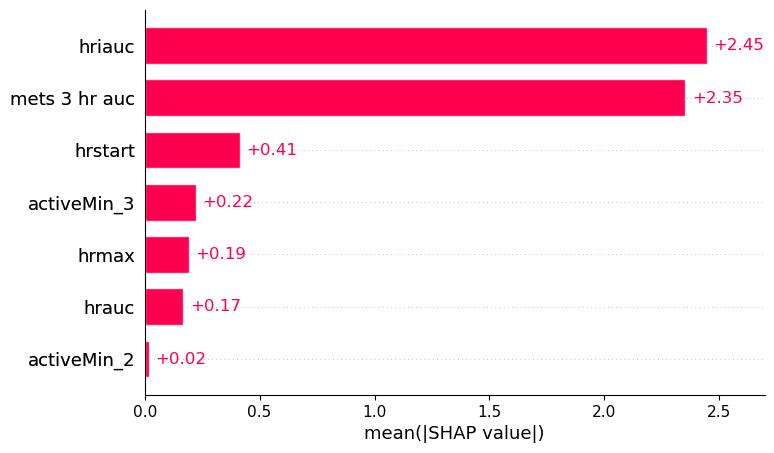

predicting startbg from mets 3 hr auc to fat:
RMSRE: 0.0725277


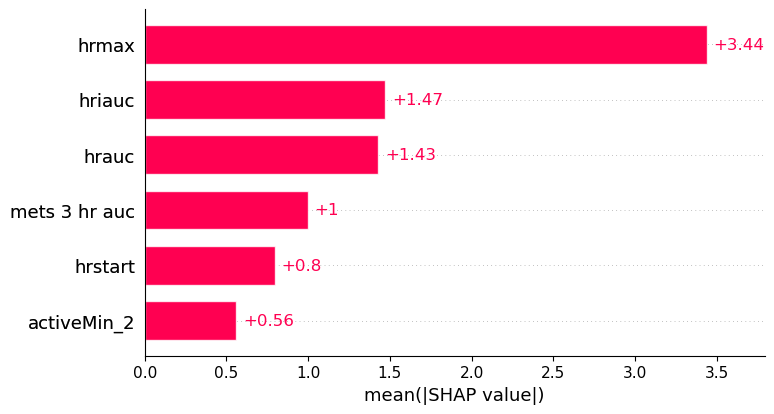

done!


In [36]:
# participants = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,26,27,28,29]
participants = [1,2,3,4,5]
inputerrors = [[],[],[],[]]
inputerrors2 = [[],[],[],[]]
predpeakh = [[],[],[],[]]
predauc = [[],[],[],[]]
prediauc = [[],[],[],[]]
predpt = [[],[],[],[]]
predpd = [[],[],[],[]]
sbg = [[],[],[],[]]

for x in participants:
    print(x)
    #predicting macros
    start = 'peakheight'
    end = 'mets 3 hr avg'
    
    runfour(inputerrors, start, end, 'carbs')
    runfour(inputerrors2, start, end, 'calories')
        
    #predicting ppgr
    start = 'mets 3 hr auc'
    end = 'fat'

    runfour(predpeakh, start, end, 'peakheight')
    runfour(predauc, start, end, 'dexcom 3hr auc')
    runfour(prediauc, start, end, 'iauc')
    runfour(predpt, start, end, 'peaktime')
    runfour(predpd, start, end, 'peakduration_40')
    runfour(sbg, start, end, 'startbg')

df = pd.DataFrame({'participants': participants, 
                  'carbs bl raw rmsre': inputerrors[0], 'carbs bl removed rmsre': inputerrors[1],
                  'carbs bld raw rmsre': inputerrors[2], 'carbs bld removed rmsre': inputerrors[3],
                  'calories bl raw rmsre': inputerrors2[0], 'calories bl removed rmsre': inputerrors2[1],
                  'calories bld raw rmsre': inputerrors2[2], 'calories bld removed rmsre': inputerrors2[3],
                  'ph bl raw rmsre': predpeakh[0], 'ph bl removed rmsre': predpeakh[1],
                  'ph bld raw rmsre': predpeakh[2], 'ph bld removed rmsre': predpeakh[3],
                  'auc bl raw rmsre': predauc[0], 'auc bl removed rmsre': predauc[1],
                  'auc bld raw rmsre': predauc[2], 'auc bld removed rmsre': predauc[3],
                  'iauc bl raw rmsre': prediauc[0], 'iauc bl removed rmsre': prediauc[1],
                  'iauc bld raw rmsre': prediauc[2], 'iauc bld removed rmsre': prediauc[3],
                  'pt bl raw rmsre': predpt[0], 'pt bl removed rmsre': predpt[1],
                  'pt bld raw rmsre': predpt[2], 'pt bld removed rmsre': predpt[3],
                  'pd40 bl raw rmsre': predpd[0], 'pd40 bl removed rmsre': predpd[1],
                  'pd40 bld raw rmsre': predpd[2], 'pd40 bld removed rmsre': predpd[3],
                  'sbg bl raw rmsre': sbg[0], 'sbg bl removed rmsre': sbg[1],
                  'sbg bld raw rmsre': sbg[2], 'sbg bld removed rmsre': sbg[3]
                  })    
    
# df = pd.DataFrame({'participants': participants, '3 hr raw rmsre': rawerrors, '3hr removed rmsre': removederrors,
#                   'dinner raw rmsre': drawerrors, 'dinner removed rmsre': dremovederrors})
#df.to_csv("untunedhractivity")

#print(f"Average raw error:{np.average(rawerrors)} \nAverage removed error: {np.average(removederrors)} \nAvg dinner raw error: {np.average(drawerrors)}\nAvg dinner removed: {np.average(dremovederrors)}")
print("done!")

In [25]:
inputerrors = [[],[],[],[]]
inputerrors2 = [[],[],[],[]]
predpeakh = [[],[],[],[]]
predauc = [[],[],[],[]]
prediauc = [[],[],[],[]]
predpt = [[],[],[],[]]
predpd = [[],[],[],[]]
sbg = [[],[],[],[]]

#predicting macros
start = 'peakheight'
end = 'mets 3 hr avg'

runfour(inputerrors, start, end, 'carbs')
runfour(inputerrors2, start, end, 'calories')

#predicting ppgr
start = 'mets 3 hr auc'
end = 'fat'

runfour(predpeakh, start, end, 'peakheight')
runfour(predauc, start, end, 'dexcom 3hr auc')
runfour(prediauc, start, end, 'iauc')
runfour(predpt, start, end, 'peaktime')
runfour(predpd, start, end, 'peakduration_40')
runfour(sbg, start, end, 'startbg')

predicting carbs from peakheight to mets 3 hr avg:
RMSRE: 0.7657426
[[ 79.8         43.         108.         ...  45.          45.
    2.71960784]
 [  0.           0.           0.         ...  11.          11.
    1.54696133]
 [ 14.         100.          17.         ...  22.          22.
    1.58453039]
 ...
 [ 93.          50.          63.         ...  18.          18.
    1.73038674]
 [ 74.8         99.         119.         ...  19.          19.
    1.80552486]
 [ 72.8         46.          49.         ...  38.          38.
    1.91436464]]
hi


Permutation explainer: 129it [00:13,  2.30it/s]                                                                                                            


IndexError: index 13 is out of bounds for axis 0 with size 13